# Social Network Analysis - Amber Heard Case - Twitter

# Investigate Same Text
Adel Abu Hashim

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
from ast import literal_eval as le

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import *

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import ast
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data_path = "../../twitter_data/"

In [3]:
# load commnets data with text processing
df_tweets_2022_prepared = pd.read_csv(data_path+"2022_prepared_tweets.csv")

In [4]:
df_metrics_2022 = pd.read_csv(data_path+"2022 Tweets_Metrics.csv")


In [5]:
df_tweets_2022_prepared = df_tweets_2022_prepared.drop_duplicates(subset=["id"])

In [6]:
df_tweets_2022_prepared.head()

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"['yeah', 'snyder', 'involved', 'flash', 'would...","['soldierboy43001', 'ZakReckless']",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"['forgot', 'hook', 'amber', 'heard', 'sure', '...","['IIMissMax', 'bg98021', 'GerberKawasaki']",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"['never', 'seen', 'aquaman', 'amber', 'heard']",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"['bl', 'content', 'anime', 'manga', 'manhwa', ..."


In [7]:
df_tweets_2022_prepared["created_at"] = pd.to_datetime(df_tweets_2022_prepared["created_at"])
df_tweets_2022_prepared["user_created_at"] = pd.to_datetime(df_tweets_2022_prepared["user_created_at"])

In [8]:
data_investigation(df_tweets_2022_prepared)

Data Head


,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."


______________________________________________________________________________

Data Shape


'The data has 497291 rows and 13 columns'

______________________________________________________________________________

Columns


['id',
 'created_at',
 'clean_text',
 'text_tokens',
 'mentions',
 'n_mentions',
 'hashtags',
 'n_hashtags',
 'user_id',
 'user_name',
 'user_created_at',
 'user_description',
 'user_description_tokens']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                                              int
created_at                 pandas._libs.tslibs.timestamps.Timestamp
clean_text                                                      str
text_tokens                                                     str
mentions                                                        str
n_mentions                                                      int
hashtags                                                        str
n_hashtags                                                      int
user_id                                                       float
user_name                                                       str
user_created_at            pandas._libs.tslibs.timestamps.Timestamp
user_description                                                str
user_description_tokens                                         str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


user_description           67557
user_description_tokens    67557
clean_text                 58134
text_tokens                58134
user_id                        3
user_name                      3
user_created_at                3
created_at                     2
id                             0
mentions                       0
n_mentions                     0
hashtags                       0
n_hashtags                     0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


user_description           0.135850
user_description_tokens    0.135850
clean_text                 0.116901
text_tokens                0.116901
user_id                    0.000006
user_name                  0.000006
user_created_at            0.000006
created_at                 0.000004
id                         0.000000
mentions                   0.000000
n_mentions                 0.000000
hashtags                   0.000000
n_hashtags                 0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,n_mentions,n_hashtags,user_id
count,497291.000000,497291.000000,4.972880e+05
mean,0.391753,1.194592,7.456669e+17
std,1.026533,1.649079,6.286331e+17
min,0.000000,0.000000,1.968000e+03
25%,0.000000,0.000000,7.726700e+08
50%,0.000000,1.000000,9.545771e+17
75%,1.000000,2.000000,1.331698e+18
max,50.000000,23.000000,1.519822e+18


______________________________________________________________________________



In [9]:
def fix_lists_columns(df, columns):
    def fix(r):
        if str(r) == "None" or str(r) == "nan":
            return r
        else:
            return le(r)
    for col in columns:
        df[col] = df[col].apply(lambda x: fix(x))

In [10]:
fix_lists_columns(
    df_tweets_2022_prepared,
    ["text_tokens", "user_description_tokens", "mentions", "hashtags",],
)

In [11]:
data_investigation(df_metrics_2022)

Data Head


,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,created_at,text,author.id,author.username
0,1477504983130116096,1,0,2.0,0.0,2022-01-02T05:00:13.000Z,@la77465262 @Melinda15199317 @Dior So why is #...,1.149795e+08,seano999
1,1477503751716065280,0,0,2.0,0.0,2022-01-02T04:55:19.000Z,Only thing I want them to leave alone is the f...,1.426227e+18,WonderWilson18


______________________________________________________________________________

Data Shape


'The data has 506657 rows and 9 columns'

______________________________________________________________________________

Columns


['id',
 'public_metrics.retweet_count',
 'public_metrics.reply_count',
 'public_metrics.like_count',
 'public_metrics.quote_count',
 'created_at',
 'text',
 'author.id',
 'author.username']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                int
public_metrics.retweet_count      int
public_metrics.reply_count        int
public_metrics.like_count       float
public_metrics.quote_count      float
created_at                        str
text                              str
author.id                       float
author.username                   str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


author.id                       23158
author.username                 23158
public_metrics.like_count           1
public_metrics.quote_count          1
created_at                          1
text                                1
id                                  0
public_metrics.retweet_count        0
public_metrics.reply_count          0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


author.id                       0.045707
author.username                 0.045707
public_metrics.like_count       0.000002
public_metrics.quote_count      0.000002
created_at                      0.000002
text                            0.000002
id                              0.000000
public_metrics.retweet_count    0.000000
public_metrics.reply_count      0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,public_metrics.retweet_count,public_metrics.like_count,public_metrics.quote_count,author.id
count,5.066570e+05,506656.000000,506656.000000,4.834990e+05
mean,4.798429e+01,47.225176,0.727719,7.389797e+17
std,2.976961e+04,2247.787727,36.033358,6.282754e+17
min,0.000000e+00,0.000000,0.000000,1.968000e+03
25%,0.000000e+00,0.000000,0.000000,7.318198e+08
50%,0.000000e+00,1.000000,0.000000,9.423402e+17
75%,0.000000e+00,5.000000,0.000000,1.329510e+18
max,2.118879e+07,666427.000000,18855.000000,1.519822e+18


______________________________________________________________________________



In [12]:
df_metrics_2022 = df_metrics_2022[
    [
        "id",
        "public_metrics.retweet_count",
        "public_metrics.reply_count",
        "public_metrics.like_count",
        "public_metrics.quote_count",
    ]
]

In [13]:
df_metrics_2022.columns = [
    "id",
    "retweet_count",
    "reply_count",
    "like_count",
    "quote_count",
]

In [14]:
df_metrics_2022.head(5)

,id,retweet_count,reply_count,like_count,quote_count
0,1477504983130116096,1,0,2.0,0.0
1,1477503751716065280,0,0,2.0,0.0
2,1477499814719983617,0,0,12.0,0.0
3,1477497740498292738,0,0,0.0,0.0
4,1477496477484212225,0,0,1.0,0.0


<a id='top'></a>
## Top repeated text





In [15]:
def hanlde_nan_and_null(x,fun,r):
    if str(x) == "None" or str(x) == "nan":
        return r
    else:
        return fun(x)

In [16]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: hanlde_nan_and_null(x, set, {})
)

In [17]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: set(x) - {"https"}
)

In [18]:
df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].shape

(426121,)

In [19]:
df_tweets_2022_prepared

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"{evidence, criminal, court, time, wasting, amb...","[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","[young, guy, varied, interests, socialist, eur..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"{1, films, leave, phase, aquaman, amber, wonde...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","[fuck, rules, favorite, k2, avril, lavigne, wo..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"{involved, would, yeah, snyder, amber, flash, ...","[soldierboy43001, ZakReckless]",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"{sure, forgot, hook, someone, find, amber, str...","[IIMissMax, bg98021, GerberKawasaki]",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"{aquaman, never, seen, amber, heard}",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"[bl, content, anime, manga, manhwa, nsfw, simm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573775,1515569901158600704,2022-04-17 05:56:37+00:00,gender card pulled out. they are now spinning ...,"{gender, kawawa, fact, manipulate, amber, hear...",[],0,[],0,2.701354e+07,GhelSandra,2009-03-27 14:25:52+00:00,tomasino est 2000something art educator.person...,"[tomasino, 2000something, art, sayaka, akimoto..."
573776,1515569890391961601,2022-04-17 05:56:34+00:00,amber heard is a libra moon. ive known a few l...,"{people, try, get, always, ive, along, bitch, ...",[],0,[],0,1.418420e+18,lilithrising_,2021-07-23 03:59:18+00:00,NaN,NaN
573777,1515569612686970883,2022-04-17 05:55:28+00:00,NaN,{},[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2,3.303069e+09,CJMoss007,2015-08-01 07:03:17+00:00,#justiceforjohnnydepp,[justiceforjohnnydepp]
573778,1515569604818575368,2022-04-17 05:55:26+00:00,"amber heard is dating eve fartlow, chelsea man...","{season, like, amber, fartlow, shark, eve, hea...",[],0,[],0,1.319471e+18,Jankem69420,2020-10-23 02:50:36+00:00,''virtue-signalling geopolitically ignorant ca...,"[geopolitically, ignorant, cartoon, mouse, lam..."


In [20]:
import time
start_time = time.time()
values = df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].apply(tuple).value_counts()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.1243503093719482 seconds ---


In [21]:
values

(johnny, depp)                                                                                                                                    3248
(heard, amber)                                                                                                                                    2957
(heard, fuck, amber)                                                                                                                              2602
(via, aquaman, petition, entertainment, amber, sign, heard, 2, dc, remove)                                                                        2434
(morning, except, everyone, amber, heard, good)                                                                                                    391
                                                                                                                                                  ... 
(lol, legendary)                                                                              

In [22]:
values = pd.DataFrame(values).reset_index().rename(columns={"index": "tokens", "text_tokens": "n_tweets"})

In [23]:
values["tokens"][0]

('johnny', 'depp')

### Values initil LOOK!

In [24]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][0])]

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
148,1477505479777697795,2022-01-02 05:02:11+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
208,1477672867420585993,2022-01-02 16:07:20+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
431,1477718860333735937,2022-01-02 19:10:05+00:00,johnny depp \n\n\n https://t.co/fxbmihk6ty,"{johnny, depp}",[],0,"[JohnnyDepp, JusticeForJohnnyDepp, WeStandWith...",4,1.383410e+18,Carolin47226771,2021-04-17 13:21:36+00:00,"i am a writer, fun, enjoy with friends in twit...","[writer, fun, enjoy, friends, twitter, simple,..."
868,1478374264797421570,2022-01-04 14:34:26+00:00,johnny depp,"{johnny, depp}",[],0,"[AmberHeardIsAnAbuser, AmberHeardIsALiar, Just...",3,2.519452e+07,missomgsrsly,2009-03-19 00:19:27+00:00,"i support johnny depp 110%, he is a dv survivo...","[support, johnny, depp, 110, dv, survivor, lic..."
1236,1478860734025113600,2022-01-05 22:47:29+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,2017-11-19 12:48:55+00:00,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567964,1510915170574516224,2022-04-04 09:40:22+00:00,johnny depp\n \n https://t.co/akaq8aodud,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",4,3.318099e+08,TopDepp,2011-07-08 19:07:24+00:00,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota..."
567965,1510915044955017218,2022-04-04 09:39:52+00:00,johnny depp\n \n https://t.co/ptclfymbou,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",4,3.318099e+08,TopDepp,2011-07-08 19:07:24+00:00,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota..."
569788,1515541263541493763,2022-04-17 04:02:49+00:00,johnny depp,"{johnny, depp}",[PipocaRefil],1,[JusticeForJohnnyDepp],1,8.489107e+17,MartinsdeCamila,2017-04-03 14:50:57+00:00,NaN,NaN
571026,1515788191374082050,2022-04-17 20:24:01+00:00,johnny depp,"{johnny, depp}",[],0,"[JohnnyDeppIsInnocent, JusticeForJohnnyDepp, A...",5,2.519452e+07,missomgsrsly,2009-03-19 00:19:27+00:00,"i support johnny depp 110%, he is a dv survivo...","[support, johnny, depp, 110, dv, survivor, lic..."


In [25]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][1])].clean_text.value_counts()

amber heard                            814
amber heard?                           128
amber heard.                            79
who is amber heard?                     22
amber heard what?                       19
                                      ... 
amber heard https://t.co/rfoa1dotik      1
who's "amber heard"                      1
against amber heard? nah                 1
amber heard has a cat?                   1
amber heard this                         1
Name: clean_text, Length: 1550, dtype: int64

In [26]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][3])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ibqxgaollz via                          5
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/u13fwk01tj via                          3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8ufry4v5oh via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jskuhhkmz0 via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/sznzup1qah via                          2
                                                                                                                             ..
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/zcrw1oz6lz via                          1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/4gd7w8hnz8 via    

In [27]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][4])].clean_text.value_counts()

good morning to everyone except amber heard                                                      211
good morning to everyone except amber heard.                                                      80
good morning to everyone, except amber heard                                                      10
good morning to everyone, except amber heard.                                                      9
good morning everyone except amber heard                                                           9
good morning to everyone except for amber heard                                                    8
good morning to everyone except for amber heard.                                                   6
good morning to everyone except amber heard!                                                       5
good morning everyone, except amber heard                                                          3
good morning everyone except amber heard.                                                  

In [28]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][5])].clean_text.value_counts()

yes                              51
yes!                             39
yes i am                         24
yes!!                            13
yes, i am                        12
                                 ..
yes.  https://t.co/nuint9h2xw     1
yes. it should.                   1
yes he is!!                       1
yes yes yes yes                   1
yes they do                       1
Name: clean_text, Length: 113, dtype: int64

In [29]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][6])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jsj5qax0f2 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/7mcs8zjxlx via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/mtkrgk2vbn via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jvudnhstf5 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/blenkk2mee via    1
                                                                                                        ..
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/k2n3trddge via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/bayq56gn6r via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/choeadep9d via    1
dc entertainment: remove amber heard 

In [30]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][8])].clean_text.value_counts()

all my homies hate amber heard                                        154
all the homies hate amber heard                                        19
all my homies hate amber heard.                                        13
me and all my homies hate amber heard                                  10
me and my homies hate amber heard                                       9
me and the homies hate amber heard                                      6
all my homies hate amber heard!!!                                       2
me & all my homies hate amber heard                                     2
me and my homies all hate amber heard                                   2
all my homies hate amber heard!                                         1
all my homies and i hate amber heard                                    1
me and my homies hate amber heard !                                     1
all my homies hate amber heard\nhttps://t.co/kqxvcbqrif                 1
all my homies hate amber heard. https:

In [31]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][10])].clean_text.value_counts()

here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/qsjc3rrgzy    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/vedyktoszy    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/71bkaojhnx    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/7ivnuptqiw    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/zyu4cv7sgk    1
                                                                                     

In [32]:
values.head(1)

,tokens,n_tweets
0,"(johnny, depp)",3248


In [33]:
values.head(10)["tokens"][0]

('johnny', 'depp')

In [34]:
values["tokens"] = values["tokens"].apply(set)

In [35]:
values["tokens"] = values["tokens"].astype(str)

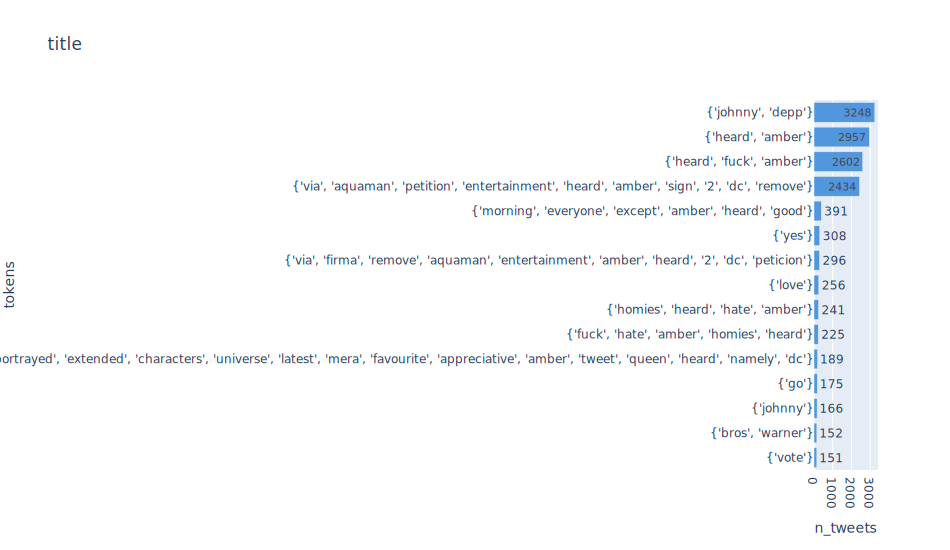

In [36]:
barh(values.head(15), "title", threshold=float("inf"), c=0)

In [37]:
values 

,tokens,n_tweets
0,"{'johnny', 'depp'}",3248
1,"{'heard', 'amber'}",2957
2,"{'heard', 'fuck', 'amber'}",2602
3,"{'via', 'aquaman', 'petition', 'entertainment'...",2434
4,"{'morning', 'everyone', 'except', 'amber', 'he...",391
...,...,...
359829,"{'legendary', 'lol'}",1
359830,"{'tim', 'westwood'}",1
359831,"{'constantly', 'character', 'johnny', 'expense...",1
359832,"{'timeline', 'relationship', 'johnny', 'leadin...",1


In [38]:
df_tweets_2022_prepared["date"] = df_tweets_2022_prepared.created_at.dt.date
df_tweets_2022_prepared["year"] = df_tweets_2022_prepared.created_at.dt.year
df_tweets_2022_prepared["month"] = df_tweets_2022_prepared.created_at.dt.month
df_tweets_2022_prepared["dayofmonth"] = df_tweets_2022_prepared.created_at.dt.day

In [39]:
df_metrics_2022

,id,retweet_count,reply_count,like_count,quote_count
0,1477504983130116096,1,0,2.0,0.0
1,1477503751716065280,0,0,2.0,0.0
2,1477499814719983617,0,0,12.0,0.0
3,1477497740498292738,0,0,0.0,0.0
4,1477496477484212225,0,0,1.0,0.0
...,...,...,...,...,...
506652,1515569901158600704,0,0,0.0,0.0
506653,1515569890391961601,0,1,0.0,1.0
506654,1515569612686970883,1,0,2.0,0.0
506655,1515569604818575368,2,0,7.0,0.0


In [40]:
values.head(10)

,tokens,n_tweets
0,"{'johnny', 'depp'}",3248
1,"{'heard', 'amber'}",2957
2,"{'heard', 'fuck', 'amber'}",2602
3,"{'via', 'aquaman', 'petition', 'entertainment'...",2434
4,"{'morning', 'everyone', 'except', 'amber', 'he...",391
5,{'yes'},308
6,"{'via', 'firma', 'remove', 'aquaman', 'enterta...",296
7,{'love'},256
8,"{'homies', 'heard', 'hate', 'amber'}",241
9,"{'fuck', 'hate', 'amber', 'homies', 'heard'}",225


In [41]:
values["tokens"] = values.tokens.apply(le).apply(set)

In [42]:
values["n_tokens"] = values.tokens.apply(len)

In [43]:
values.n_tokens.value_counts()

6     25273
7     25221
8     24660
5     24324
9     23139
4     21733
10    21683
11    19311
12    17274
3     15478
13    15365
14    13990
15    12856
16    12027
17    11040
18    10669
2     10586
19    10102
20     9018
21     7978
22     6943
23     5602
24     4180
1      3198
25     2997
26     1990
27     1271
28      741
29      409
30      278
31      147
32      105
33       64
34       46
35       36
37       20
36       18
38       12
39       11
42        9
41        8
40        6
44        5
43        2
57        2
51        1
45        1
46        1
55        1
60        1
49        1
50        1
Name: n_tokens, dtype: int64

In [48]:
class SameText:
    def __init__(self, df, token, add_more):
        if add_more:
            self.token_df = df[
                df.text_tokens.isin(
                    [
                        set(le(str(i)))
                        for i in values[
                            values.tokens.apply(
                                lambda x: len(set(le(str(token))) - x) == 0
                            )
                        ].tokens.values
                    ]
                )
            ]
        else:
            self.token_df = df[df.text_tokens == set(le(str(token)))]
        self.token = str(token)

    def n_commnets_unique(self):
        print(
            f"This comment appeared in {self.token_df.clean_text.value_counts().shape[0]} shape"
        )

    def get_df(self):
        return self.token_df

    def get_stats(self):
        users = self.token_df.user_name.nunique()
        print(
            f"This text appeared {self.token_df.shape[0]} in {self.token_df.clean_text.value_counts().shape[0]} shape from {users} users "
        )

    def users(self):
        return self.token_df.user_name.value_counts()

    def dates(self):
        return self.token_df.date.value_counts()

    def head(self, n):
        return self.token_df.head(n)

    def shapes(self, n):
        return self.token_df.clean_text.value_counts().head(n)

    def peak(self, n):
        bar_peaks(
            self.dates()
            .to_frame()
            .reset_index()
            .head(n)
            .rename(columns={"date": "n_comments"})
            .rename(columns={"index": "date"}),
            f"Peak Dates for {self.token}",
        )

    def date_info(self):
        min = self.dates().index.min()
        max = self.dates().index.max()
        print(f"The commentes were made between {min} and  {max}")
        print(
            self.token_df.groupby(self.token_df.created_at.dt.year)
            .count()["clean_text"]
            .to_frame()
            .rename(columns={"clean_text": "n_tweets"})
        )
        pie(
            self.token_df.groupby(self.token_df.created_at.dt.year)
            .count()["clean_text"]
            .to_frame()
            .reset_index(),
            "Numner of Comments Per Year",
        )

        facet_heat(self.token_df, title="Number of tweets Per Day")

        for year in self.token_df.year.unique():
            facet_days(self.token_df, str(int(year)))

    def users_dates(self, n):
        return (
            self.token_df.groupby(["username", "date"])
            .count()["message"]
            .sort_values(ascending=False)
            .head(n)
        )

    def df_timing(self):
        df = self.get_df()
        df = df.sort_values("created_at")
        df["diff"] = df.created_at.diff()
        return pd.concat([df, df["diff"].dt.components.iloc[:, 0:3]], axis=1)

    def get_groups(self, date):
        df = self.df_timing()
        return set(
            df[(df.days == 0) & (df.hours == 0) & (df.date.astype(str) == date)]
            .username.value_counts()
            .index
        )

    def get_metrics(self):
        df_with_merics = pd.merge(self.token_df, df_metrics_2022, how="left")
        metrics_dict = {
            "retweet_count": df_with_merics["retweet_count"].sum(),
            "reply_count": df_with_merics["reply_count"].sum(),
            "like_count": df_with_merics["like_count"].sum(),
            "quote_count": df_with_merics["quote_count"].sum(),
        }
        display(pd.Series(metrics_dict.values(), index=metrics_dict.keys(),))

    def get_times(self):
        df = self.df_timing().query(" days == 0  and  hours == 0  and minutes == 0")
        print(
            f"{df.shape[0]} tweets from {self.token_df.shape[0]} tweets made in less than 1 min from previous tweet by {df.user_name.nunique()} users"
        )

<a id='jd'></a>
### johnny depp

<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>



In [49]:
values[values.tokens.apply(lambda x: len(values.tokens[0] - x) == 0)]

,tokens,n_tweets,n_tokens
0,"{johnny, depp}",3248,2
15,"{johnny, heard, depp, amber}",150,4
19,"{heard, johnny, depp, amber}",138,4
25,"{evidence, justice, continuing, firing, proven...",106,22
31,"{love, daily, tweet, johnny, depp}",96,5
...,...,...,...
359811,"{julgamento, elite, segurancas, johnny, contra...",1,8
359820,"{testimony, witness, driving, trial, heard, va...",1,13
359828,"{vs, marry, reacts, via, brand, russell, frfr,...",1,14
359831,"{constantly, fun, character, expense, lawyer, ...",1,15


In [50]:
jd = SameText(df_tweets_2022_prepared, values.tokens[0],False)

In [51]:
jd.get_stats()

This text appeared 3248 in 212 shape from 150 users 


In [52]:
jd.get_metrics()

retweet_count     1472.0
reply_count        255.0
like_count       11082.0
quote_count        173.0
dtype: float64

In [53]:
jd.shapes(18)

johnny depp                                    2656
i johnny depp                                   367
i, johnny depp                                    6
i, johnny depp.                                   4
"i johnny depp"                                   4
this!\njohnny depp                                2
no sin johnny depp.                               2
for johnny depp                                   2
this ..... is johnny depp!                        2
i johnny depp...                                  1
i, johnny depp\n    https://t.co/irmeun8pwg       1
i,johnny depp                                     1
johnny depp  https://t.co/ran6jovnrw              1
i, johnny depp\nand he did.                       1
johnny depp\n\n https://t.co/5tbga5yi66           1
johnny depp\n  \n  https://t.co/g3ovu9arah        1
johnny depp\n  \n  https://t.co/b6hkrl1cfz        1
and so he did\n\ni johnny depp                    1
Name: clean_text, dtype: int64

In [54]:
jd.dates()

2022-04-21    479
2022-04-13    377
2022-04-26    367
2022-03-01    323
2022-04-20    322
             ... 
2022-03-14      1
2022-01-04      1
2022-03-22      1
2022-03-04      1
2022-03-07      1
Name: date, Length: 87, dtype: int64

In [55]:
jd.get_df().id.value_counts()

1477505479777697795    1
1519014678126551041    1
1518758056494084097    1
1518757918253928448    1
1518757745587068929    1
                      ..
1498469771922317316    1
1498469697255268355    1
1498469246199898112    1
1498468905626574858    1
1515759812935573507    1
Name: id, Length: 3248, dtype: int64

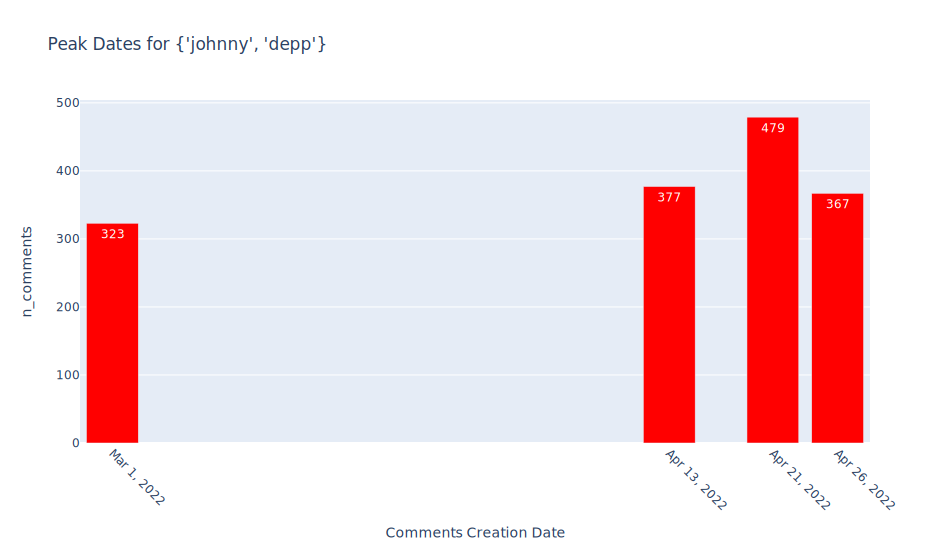

In [56]:
jd.peak(4)

In [57]:
jd.get_times()

1517 tweets from 3248 tweets made in less than 1 min from previous tweet by 31 users


In [58]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
1237,1478860586167545858,2022-01-05 22:46:54+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:55,0.0,0.0,0.0
1236,1478860734025113600,2022-01-05 22:47:29+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:35,0.0,0.0,0.0
1335,1478875384951230464,2022-01-05 23:45:42+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:10,0.0,0.0,0.0
1332,1478875811574865921,2022-01-05 23:47:24+00:00,johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,9.322292e+17,DeppSoldier_22,...,laugh as much as you breathe and love as long ...,"[laugh, much, breathe, love, long, live, today...",2022-01-05,2022.0,1.0,5.0,0 days 00:00:35,0.0,0.0,0.0
12126,1483769417523773446,2022-01-19 11:52:50+00:00,johnny depp\n\n\n https://t.co/ymygerdwrd,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, WeAreWithYouJohnnyDepp,...",3,3.318099e+08,TopDepp,...,merci #johnnydepp\n#justiceforjohnnydepp\n#not...,"[merci, johnnydepp, justiceforjohnnydepp, nota...",2022-01-19,2022.0,1.0,19.0,0 days 00:00:31,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280854,1519004514262548482,2022-04-26 17:24:32+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:39,0.0,0.0,0.0
280829,1519004698241605633,2022-04-26 17:25:16+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:44,0.0,0.0,0.0
280764,1519005188459220999,2022-04-26 17:27:13+00:00,i johnny depp,"{johnny, depp}",[],0,"[JusticeForJohnnyDepp, JusticeForJohhnyDepp]",2,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:37,0.0,0.0,0.0
295018,1519014830556000257,2022-04-26 18:05:32+00:00,i johnny depp,"{johnny, depp}",[],0,[JusticeForJohnnyDepp],1,7.082501e+17,BoteroStar,...,NaN,NaN,2022-04-26,2022.0,4.0,26.0,0 days 00:00:37,0.0,0.0,0.0


In [59]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

1237     0 days 00:00:55
1236     0 days 00:00:35
1335     0 days 00:00:10
1332     0 days 00:00:35
12126    0 days 00:00:31
               ...      
280854   0 days 00:00:39
280829   0 days 00:00:44
280764   0 days 00:00:37
295018   0 days 00:00:37
332986   0 days 00:00:24
Name: diff, Length: 1517, dtype: timedelta64[ns]

In [60]:
len(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

31

In [61]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

DeppSoldier_22     1264
BoteroStar          210
TopDepp              13
Martini0731           2
missomgsrsly          2
kermccoy              1
hy_anotherme          1
bryzwyf               1
Majik_Marjoram        1
majkearney            1
SimplyyShaina         1
thenewageicon         1
CinqueCaps            1
SarahEisen27          1
Lene42268156          1
mariamaria4848        1
Sailthe5Oceans        1
mmldtxt               1
brahstol              1
ReemDepp              1
selsmitch             1
nihalien              1
evegeorgia_           1
moonlight4522         1
carolinassll          1
RichsrdAnderson       1
turdefaroth           1
AraujoMartinski       1
AustenMathieson       1
KTN12201              1
77Sunflow             1
Name: user_name, dtype: int64

In [62]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    264
2022-04-26    258
2022-04-13    217
2022-02-28    188
2022-04-20    148
2022-03-01    116
2022-02-17     64
2022-03-25     62
2022-02-15     58
2022-04-06     35
2022-03-26     13
2022-02-16     12
2022-04-05     11
2022-03-16     11
2022-04-25      8
2022-03-24      7
2022-03-02      5
2022-04-12      5
2022-04-08      5
2022-01-05      4
2022-01-19      4
2022-04-07      3
2022-03-17      3
2022-04-19      3
2022-04-15      2
2022-02-23      2
2022-01-23      2
2022-04-04      1
2022-04-02      1
2022-03-30      1
2022-03-11      1
2022-02-27      1
2022-02-01      1
2022-04-28      1
Name: date, dtype: int64

In [63]:
list(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['DeppSoldier_22',
 'BoteroStar',
 'TopDepp',
 'Martini0731',
 'missomgsrsly',
 'kermccoy',
 'hy_anotherme',
 'bryzwyf',
 'Majik_Marjoram',
 'majkearney',
 'SimplyyShaina',
 'thenewageicon',
 'CinqueCaps',
 'SarahEisen27',
 'Lene42268156',
 'mariamaria4848',
 'Sailthe5Oceans',
 'mmldtxt',
 'brahstol',
 'ReemDepp',
 'selsmitch',
 'nihalien',
 'evegeorgia_',
 'moonlight4522',
 'carolinassll',
 'RichsrdAnderson',
 'turdefaroth',
 'AraujoMartinski',
 'AustenMathieson',
 'KTN12201',
 '77Sunflow']

In [64]:
jd.get_df().mentions.value_counts()

[]                                                                                                  3200
[DeppSoldier_22]                                                                                      11
[realamberheard]                                                                                       2
[PipocaRefil]                                                                                          2
[PlzeExplain512]                                                                                       2
[scrowder]                                                                                             2
[ZellnerLaw]                                                                                           2
[KathJenkins]                                                                                          1
[wbpictures]                                                                                           1
[ElectionWiz]                                          

In [65]:
jd.get_df().hashtags.value_counts()

[JusticeForJohnnyDepp]                                                                                                     2479
[JusticeForJohnnyDepp, JusticeForJohhnyDepp]                                                                                136
[JohnnyDepp, JusticeForJohnnyDepp]                                                                                           86
[JusticeForJohhnyDepp, JusticeForJohnnyDepp]                                                                                 51
[AmberTurd, AmberHeardIsALiar, JusticeForJohnnyDepp]                                                                         47
                                                                                                                           ... 
[JusticeForJohnnyDepp, JusticeForJohnnyDeppVirginia2022, Lunes]                                                               1
[AbuseHasNoGender, MenToo, AmberHeardIsAnAbuser, JusticeForJohnnyDeppVirginia2022]                      

<a id='ah'></a>
### amber heard
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [67]:
values[values.tokens.apply(lambda x: len(values.tokens[1] - x) == 0)]

,tokens,n_tweets,n_tokens
1,"{heard, amber}",2957,2
2,"{heard, fuck, amber}",2602,3
3,"{via, aquaman, petition, entertainment, amber,...",2434,10
4,"{morning, amber, heard, everyone, except, good}",391,6
6,"{via, dc, firma, aquaman, entertainment, amber...",296,10
...,...,...,...
359825,"{movie, lifetime, would, tweet, play, doot, do...",1,14
359827,"{hell, falls, hope, feecies, heard, amber, con...",1,10
359828,"{vs, marry, reacts, via, brand, russell, frfr,...",1,14
359831,"{constantly, fun, character, expense, lawyer, ...",1,15


In [66]:
ah = SameText(df_tweets_2022_prepared, values.tokens[1], False)

In [68]:
ah.get_stats()

This text appeared 2957 in 1550 shape from 2561 users 


In [69]:
ah.get_metrics()

retweet_count     6109.0
reply_count       3225.0
like_count       90334.0
quote_count        537.0
dtype: float64

In [70]:
ah.shapes(18)

amber heard                814
amber heard?               128
amber heard.                79
who is amber heard?         22
amber heard what?           19
amber heard...              18
amber heard 2.0             15
is that amber heard?        14
amber heard*                13
and amber heard             13
amber heard ?               13
@ amber heard               13
amber heard!                13
amber heard is              12
not amber heard             12
amber heard:                11
what about amber heard?     11
who's amber heard?          10
Name: clean_text, dtype: int64

In [71]:
jd.dates()

2022-04-21    479
2022-04-13    377
2022-04-26    367
2022-03-01    323
2022-04-20    322
             ... 
2022-03-14      1
2022-01-04      1
2022-03-22      1
2022-03-04      1
2022-03-07      1
Name: date, Length: 87, dtype: int64

In [72]:
ah.get_df().id.value_counts()

1477545767858491399    1
1519595345617039362    1
1519792748051767298    1
1519789695445893120    1
1519789630027177984    1
                      ..
1517495061780566017    1
1517494819614072833    1
1517493863690039296    1
1517547271415607298    1
1515572685518036992    1
Name: id, Length: 2957, dtype: int64

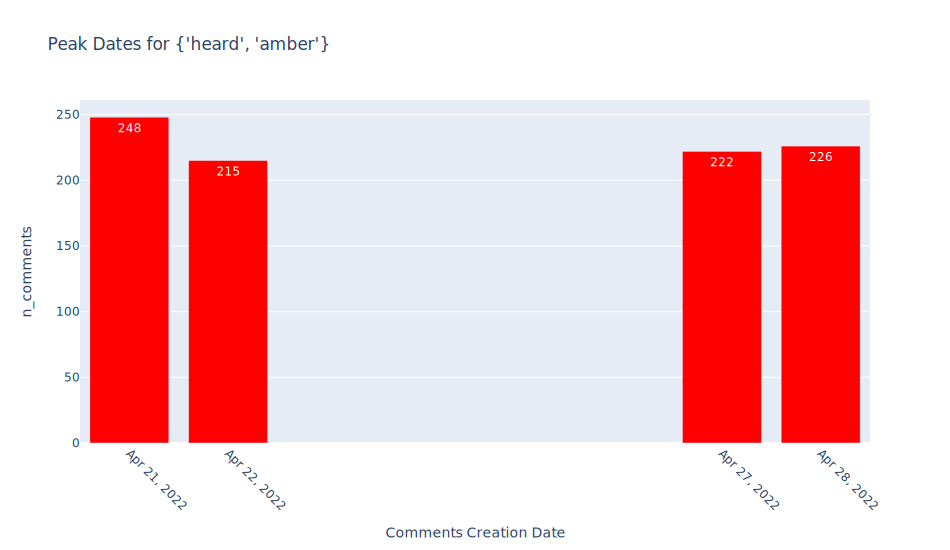

In [73]:
ah.peak(4)

In [74]:
ah.get_times()

315 tweets from 2957 tweets made in less than 1 min from previous tweet by 297 users


In [75]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
15259,1479984155010109445,2022-01-09 01:11:33+00:00,amber heard,"{heard, amber}",[],0,[],0,1.418558e+18,AHeardLatino,...,primera cuenta de amber heard ( @realamberhear...,"[primera, cuenta, amber, heard, realamberheard...",2022-01-09,2022.0,1.0,9.0,0 days 00:00:07,0.0,0.0,0.0
15031,1487157782788907008,2022-01-28 20:17:00+00:00,amber heard https://t.co/i4pmpvsn1a,"{heard, amber}",[],0,[],0,1.100133e+08,VinnyLopesRocks,...,i am ex-guitarist of the band emergency\nmore ...,"[band, emergency, today, known, daruma, 32, in...",2022-01-28,2022.0,1.0,28.0,0 days 00:00:45,0.0,0.0,0.0
30231,1493632821784633356,2022-02-15 17:06:29+00:00,amber heard https://t.co/9ticsajmkz,"{heard, amber}",[],0,[],0,1.270628e+18,cineasimetrico,...,aqui encontraras en una sola instantanea... ar...,"[aqui, encontraras, sola, instantanea, arte, f...",2022-02-15,2022.0,2.0,15.0,0 days 00:00:29,0.0,0.0,0.0
24708,1496365183819784194,2022-02-23 06:03:55+00:00,amber heard\n https://t.co/g9or0x1hnn,"{heard, amber}",[],0,[AmberHeard],1,1.475626e+18,deviloofhell,...,#actress #wallpapers,"[actress, wallpapers]",2022-02-23,2022.0,2.0,23.0,0 days 00:00:05,0.0,0.0,0.0
32987,1497403501235912706,2022-02-26 02:49:49+00:00,amber heard https://t.co/b4uqno1ilf,"{heard, amber}",[],0,[],0,1.008168e+09,SoniCubed,...,#liberty #greengop #greenconservative #bitcoin...,"[liberty, greengop, greenconservative, bitcoin...",2022-02-26,2022.0,2.0,26.0,0 days 00:00:17,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334596,1519787153961717760,2022-04-28 21:14:28+00:00,amber heard,"{heard, amber}",[JuanitoSay],1,[],0,1.158745e+09,EnzoCostasMedin,...,nada es obvio,[obvio],2022-04-28,2022.0,4.0,28.0,0 days 00:00:54,0.0,0.0,0.0
334074,1519789630027177984,2022-04-28 21:24:18+00:00,amber heard,"{heard, amber}",[Judithdez15],1,[],0,1.501032e+18,itsmajoliciouss,...,out of sight out of mind,"[sight, mind]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:47,0.0,0.0,0.0
334063,1519789695445893120,2022-04-28 21:24:34+00:00,me when amber heard:,"{heard, amber}",[],0,[],0,1.391615e+18,epexu1,...,merry padoru christmas!!!!!!,"[merry, padoru, christmas]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:16,0.0,0.0,0.0
333126,1519794795413180418,2022-04-28 21:44:50+00:00,amber heard https://t.co/3cmevazjo8,"{heard, amber}",[JuanitoSay],1,[],0,8.622280e+07,annaliliam,...,borahae,[borahae],2022-04-28,2022.0,4.0,28.0,0 days 00:00:12,0.0,0.0,0.0


In [76]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

15259    0 days 00:00:07
15031    0 days 00:00:45
30231    0 days 00:00:29
24708    0 days 00:00:05
32987    0 days 00:00:17
               ...      
334596   0 days 00:00:54
334074   0 days 00:00:47
334063   0 days 00:00:16
333126   0 days 00:00:12
347011   0 days 00:00:34
Name: diff, Length: 315, dtype: timedelta64[ns]

In [77]:
len(ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

297

In [78]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

cineasimetrico     7
VinnyLopesRocks    3
SoniCubed          3
Lilloisdu83        2
malpicasea         2
                  ..
poo_priest         1
la__lupita         1
ravetta_pier       1
bladeofmiqueIIa    1
tay__marvete       1
Name: user_name, Length: 297, dtype: int64

In [79]:
ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    44
2022-04-27    42
2022-04-22    41
2022-04-28    32
2022-04-26    30
2022-04-25    25
2022-04-20    22
2022-04-23    19
2022-04-24    10
2022-04-14     9
2022-04-13     7
2022-04-15     3
2022-04-12     3
2022-04-06     3
2022-02-26     3
2022-03-23     2
2022-04-16     2
2022-03-17     2
2022-04-09     2
2022-04-08     1
2022-02-15     1
2022-02-23     1
2022-03-01     1
2022-03-14     1
2022-04-19     1
2022-03-24     1
2022-04-18     1
2022-04-17     1
2022-04-03     1
2022-04-04     1
2022-01-28     1
2022-04-10     1
2022-01-09     1
Name: date, dtype: int64

In [80]:
list(ah.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['cineasimetrico',
 'VinnyLopesRocks',
 'SoniCubed',
 'Lilloisdu83',
 'malpicasea',
 'MauricioGarcex',
 'HanSolo25563981',
 'mileyydaya',
 'valmir_brum',
 'servncompanyltd',
 'jdemboyz',
 'JuanAnt52654252',
 'AHeardLatino',
 'ainarzzzz',
 'DzanicED',
 'zorinkp',
 'lechuga_rancia',
 'Way2ManyVoices',
 'WhackstarDanie',
 'UrOnlyAsteria',
 'theprodigalJ',
 'dayashowlett',
 'Tingaling007',
 'elblogdeseba',
 'BladimirArango',
 'therealclemhall',
 'vrugsy',
 'MolegGolem',
 'Apple_Whore_',
 'VDeltaforce',
 'TiqWRLD',
 'CameronMcDonne5',
 'scubacheeze',
 'buttshapedbox',
 'thefdude_',
 'JamesWilliamTi2',
 'dizzydayyz',
 'FalconiFenix',
 'Silver4678',
 'AlexAlvis11',
 'plspassthepinot',
 'RobotThomas',
 'LightingNave',
 'Holly1420',
 'kritis_admirer',
 'Antonio740320',
 'sarcsausageroll',
 'markfidelman',
 'siberiasu',
 'RenSan_00',
 'duhklein',
 'Arkoth_DS',
 'adz_ak47',
 'Lifeofboblo22',
 'James_L55_G',
 'yawnzjn',
 'wornwui',
 'DaveStone92',
 'ktsimmo',
 'CANTquitMUSIC',
 'fnyfnyfnyfny',
 'l

In [81]:
ah.get_df().mentions.value_counts()

[]                   1279
[elonmusk]            107
[UberFacts]            29
[HollywoodLowman]      25
[AdrianaInBloom]       10
                     ... 
[SarahBurssty]          1
[ScottAdamsSays]        1
[monglalamejor]         1
[johnnydepp_mex]        1
[fromthereel]           1
Name: mentions, Length: 1346, dtype: int64

In [82]:
ah.get_df().hashtags.value_counts()

[]                        2759
[JusticeForJohnnyDepp]      29
[AmberHeard]                10
[MePoo]                     10
[AmberHeardIsAnAbuser]       4
                          ... 
[Ak, KaderiminOyunu]         1
[Racist]                     1
[Sister]                     1
[Monogamy]                   1
[MeToo]                      1
Name: hashtags, Length: 135, dtype: int64

<a id='f'></a>
### f*ck amber heard

<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>



In [84]:
values[values.tokens.apply(lambda x: len(values.tokens[2] - x) == 0)]

,tokens,n_tweets,n_tokens
2,"{heard, fuck, amber}",2602,3
9,"{fuck, hate, amber, homies, heard}",225,5
29,"{bitch, heard, fuck, amber}",98,4
47,"{jada, fuck, amber, coleslaw, heard, smith}",76,6
58,"{bitch, fuck, amber, heard, named}",71,5
...,...,...,...
359489,"{actually, fuck, shitting, bed, supports, team...",1,15
359568,"{ass, fuck, always, tac, toe, tic, 1v1, amber,...",1,13
359676,"{like, shut, innocent, exist, find, ludicrous,...",1,16
359699,"{disorder, bpd, reminder, honestly, amber, fri...",1,17


In [85]:
f = SameText(df_tweets_2022_prepared, values.tokens[2], False)

In [86]:
f.get_stats()

This text appeared 2602 in 261 shape from 2517 users 


In [87]:
f.get_metrics()

retweet_count    1016.0
reply_count       535.0
like_count       8360.0
quote_count        64.0
dtype: float64

In [88]:
f.shapes(18)

fuck amber heard                  1625
fuck amber heard.                  245
fuck you amber heard               118
fuck amber heard!                   64
and fuck amber heard                41
man fuck amber heard                33
fuck u amber heard                  21
yo fuck amber heard                 19
fuck you amber heard.               15
fuck amber heard man                13
fuck. amber. heard.                 12
fuck amber heard!!                  11
fuck amber heard!!!                 10
fuck you, amber heard               10
fuck amber heard!!!!                 9
fuck amber heard. that is all.       8
again fuck amber heard               7
fuck amber heard !!                  7
Name: clean_text, dtype: int64

In [89]:
f.dates()

2022-04-21    652
2022-04-22    360
2022-04-20    326
2022-04-26    147
2022-04-14    140
             ... 
2022-03-04      1
2022-03-22      1
2022-03-11      1
2022-03-15      1
2022-03-12      1
Name: date, Length: 64, dtype: int64

In [90]:
f.get_df().id.value_counts()

1478462314596679683    1
1514349371906613248    1
1514282664072663044    1
1514282632657313794    1
1514281068551196672    1
                      ..
1516789376986107912    1
1516788246344306694    1
1516786071291318275    1
1516784367573606401    1
1515753644704112640    1
Name: id, Length: 2602, dtype: int64

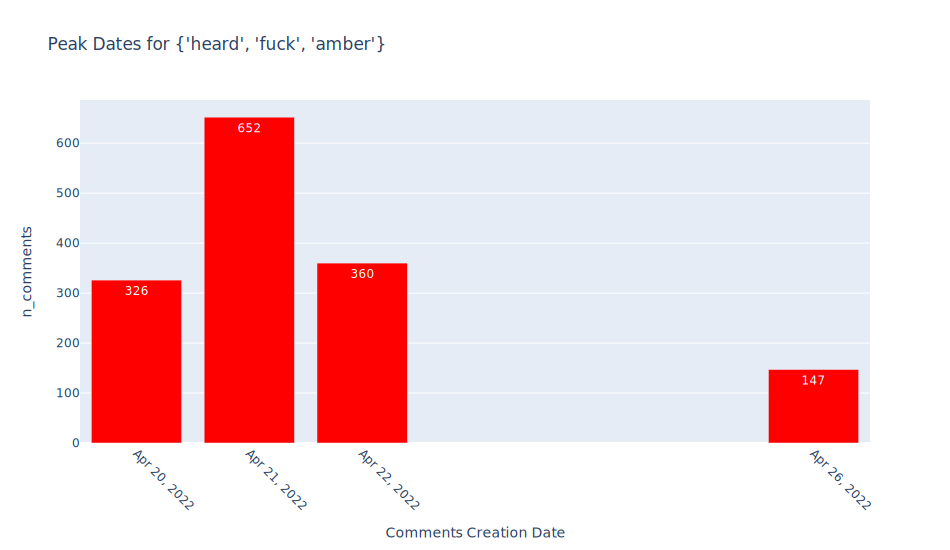

In [91]:
f.peak(4)

In [92]:
f.get_times()

560 tweets from 2602 tweets made in less than 1 min from previous tweet by 559 users


In [93]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
247727,1512961965093797888,2022-04-10 01:13:36+00:00,fuck amber heard.,"{heard, fuck, amber}",[],0,[JusticeForJohnnyDepp],1,1.132810e+18,kavickers23,...,1/3 of the all star nerds on youtube,"[star, nerds, youtube]",2022-04-10,2022.0,4.0,10.0,0 days 00:00:10,0.0,0.0,0.0
149219,1513906190081740802,2022-04-12 15:45:37+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,1.474535e+18,lilysaltt,...,meow for me kitten,"[meow, kitten]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:10,0.0,0.0,0.0
253572,1513957310162358274,2022-04-12 19:08:45+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,1.905983e+09,cassieissassyy,...,attention k mart shoppers ! univ. of az,"[attention, mart, shoppers, univ]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:11,0.0,0.0,0.0
253570,1513957314302205969,2022-04-12 19:08:46+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,2.474849e+09,fatboyoso,...,luv(sic),"[luv, sic]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:01,0.0,0.0,0.0
155680,1513982978342461446,2022-04-12 20:50:45+00:00,fuck you amber heard https://t.co/1s4by54wq2,"{heard, fuck, amber}",[],0,[JusticeForJohnnyDepp],1,1.263989e+18,ItsAngjolie,...,only for the only angelina jolie /\nangelina j...,"[angelina, jolie, angelina, jolie, wife]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:23,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165160,1519145988769861635,2022-04-27 02:46:42+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,7.468980e+08,xydney00,...,"ask for strength, not sympathy","[ask, strength, sympathy]",2022-04-27,2022.0,4.0,27.0,0 days 00:00:16,0.0,0.0,0.0
165156,1519146064993046528,2022-04-27 02:47:00+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,2.583219e+09,thatgirldebx3,...,mangia bene * ridi spesso * ama molto,"[mangia, bene, ridi, spesso, molto]",2022-04-27,2022.0,4.0,27.0,0 days 00:00:18,0.0,0.0,0.0
348770,1519478216536252416,2022-04-28 00:46:52+00:00,fuck amber heard,"{heard, fuck, amber}",[],0,[],0,1.376648e+18,marissssabellla,...,carter dean,"[carter, dean]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:34,0.0,0.0,0.0
371605,1519482226022490112,2022-04-28 01:02:47+00:00,fuck amber heard\nhttps://t.co/p9wpg0spni,"{heard, fuck, amber}",[],0,"[JusticeForJohnny, AmberTurd, CancelAmberTurd]",3,1.384805e+08,ItsBildo,...,"i'm just a guy, meandering thru life trying to...","[guy, meandering, thru, life, trying, bump, st...",2022-04-28,2022.0,4.0,28.0,0 days 00:00:24,0.0,0.0,0.0


In [94]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

247727   0 days 00:00:10
149219   0 days 00:00:10
253572   0 days 00:00:11
253570   0 days 00:00:01
155680   0 days 00:00:23
               ...      
165160   0 days 00:00:16
165156   0 days 00:00:18
348770   0 days 00:00:34
371605   0 days 00:00:24
341468   0 days 00:00:00
Name: diff, Length: 560, dtype: timedelta64[ns]

In [95]:
len(f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

559

In [96]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

sweetyhoneybby     2
__WillyG_          1
Dotty_19           1
mtayj              1
xohannah3_         1
                  ..
anti_saiyan        1
touchstarveddie    1
lilrosexoxo        1
onlypainszn        1
flvcko93           1
Name: user_name, Length: 559, dtype: int64

In [97]:
f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-21    258
2022-04-20    106
2022-04-22     91
2022-04-19     21
2022-04-26     20
2022-04-13     13
2022-04-14     12
2022-04-25     11
2022-04-12      8
2022-04-23      8
2022-04-27      3
2022-04-28      3
2022-04-15      2
2022-04-24      2
2022-04-10      1
2022-04-17      1
Name: date, dtype: int64

In [98]:
list(f.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['sweetyhoneybby',
 '__WillyG_',
 'Dotty_19',
 'mtayj',
 'xohannah3_',
 'King__Sanchez',
 'AmbitiousAnt410',
 'walbycurtis',
 'seapirata',
 'VoiceOfADeity',
 'ChefRustic420',
 'joceeyyy_',
 'SarahSiren16',
 'dubstephentai',
 'gelatojules',
 'rachellexv',
 'seokjinniekook',
 '__littleonex',
 'saraa_stimsonn',
 'g0ldcage',
 'TimeS0ldier',
 'M09RIAM',
 'cartiieraa',
 'BertsHurt',
 'amydolcee',
 'KinMakesMusic',
 'YRN_Quintrix',
 'trtl_raf',
 'Rose_flufff',
 'AltGirlAmelia',
 'yesstarismyname',
 'exoticmethods',
 'fuck_racists_',
 'TONGUETIED91',
 'golfinglegendxd',
 'kavickers23',
 'NotTodayEdBoy',
 'yvetterss',
 'WhitneyMarlene',
 'bigfinemami',
 'MyNameIsLegato',
 'HarrisJayden3',
 'diazxi_',
 'WlNXYCLUB',
 'teejaysantos99',
 'itskarolinaa',
 'brookecsuka_',
 'Jerome_Valeska1',
 'DinoTruth',
 'mmoldybread',
 'shariitachi',
 'samanthaccc_',
 'michikoxscape',
 '___________nl',
 'xojvnet',
 'TaiyoYozakura',
 'itsbeatfreak',
 'tristanssssss',
 'PxrnstarKastle',
 'bbenw7',
 'strawberriaxo',


In [99]:
f.get_df().mentions.value_counts()

[]                                   2569
[elonmusk]                              5
[wbpictures]                            3
[warnerbros]                            2
[realamberheard]                        2
[Riot_Bruh]                             1
[ke_Tsholo]                             1
[itssleann]                             1
[chrispinerd]                           1
[warnerbros, Disney]                    1
[aburkhartlaw]                          1
[TinthDoctor]                           1
[theMemesBot]                           1
[jerseypabo]                            1
[JessicaFey7]                           1
[LivingMagazineW]                       1
[wbpictures, warnerbros]                1
[delsruined]                            1
[Tenshi_KC]                             1
[JitasPrivate]                          1
[AshaleeeMarieee, LuLusgreeneyes]       1
[aquamanmovie]                          1
[teslaownersSV, elonmusk]               1
[iFangirlLots]                    

In [100]:
f.get_df().hashtags.value_counts()

[]                                                                                                                      2357
[JusticeForJohnnyDepp]                                                                                                   124
[JusticeForJohnnyDeep]                                                                                                    20
[JusticeForJohhnyDepp]                                                                                                    15
[JusticeforJohnnyDepp]                                                                                                     8
                                                                                                                        ... 
[JusticeForJohnnyDepp, JohnnyDeppVsAmberHeard]                                                                             1
[JohnnyDeppVsAmberHeard, JohnnyDeppDeservesJustice, JohnnyDeppIsInnocent, JohnnyDepp, AmberHeardIsALiar, AmberHeard]       1


<a id='dc'></a>
### remove amber heard from aquaman 2
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>

In [101]:
values[values.tokens.apply(lambda x: len(values.tokens[3] - x) == 0)]

,tokens,n_tweets,n_tokens
3,"{via, aquaman, petition, entertainment, amber,...",2434,10
472,"{signed, via, aquaman, petition, entertainment...",18,11
1771,"{via, aquaman, petition, entertainment, heard,...",7,10
2734,"{via, owe, petition, restoration, aquaman, mr,...",5,18
2982,"{signed, via, get, aquaman, petition, entertai...",5,13
...,...,...,...
356519,"{go, goooo, via, aquaman, petition, entertainm...",1,15
357458,"{via, psycho, false, fan, aquaman, petition, v...",1,21
358243,"{via, aqua, aquaman, petition, show, signing, ...",1,20
359311,"{via, simply, aquaman, petition, cancel, enter...",1,14


In [102]:
dc = SameText(df_tweets_2022_prepared, values.tokens[3], True)

In [103]:
dc.get_stats()

This text appeared 2825 in 2794 shape from 2696 users 


In [104]:
dc.get_metrics()

retweet_count    1151.0
reply_count       252.0
like_count       3820.0
quote_count       123.0
dtype: float64

In [107]:
dc.shapes(20)

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ibqxgaollz via                                                                                  5
pls s&s!  \n& \nowe mr depp a huge apology and restoration of all contracts!\ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/qlf6y61d39 via    3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/u13fwk01tj via                                                                                  3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ion2krgljq via                                                                                  2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/5vvcs9tcst via                                                                                  2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https:/

In [108]:
dc.dates()

2022-04-28    2190
2022-04-25      97
2022-04-26      77
2022-04-27      71
2022-04-23      46
              ... 
2022-03-09       1
2022-03-08       1
2022-02-19       1
2022-02-07       1
2022-03-23       1
Name: date, Length: 93, dtype: int64

In [109]:
dc.get_df().id.value_counts()

1477511039835009025    1
1519717148159008768    1
1519720911397609473    1
1519720887217389568    1
1519720859203772417    1
                      ..
1519773893246038016    1
1519773821724762112    1
1519773808395272193    1
1519773742812991489    1
1515747609113202689    1
Name: id, Length: 2825, dtype: int64

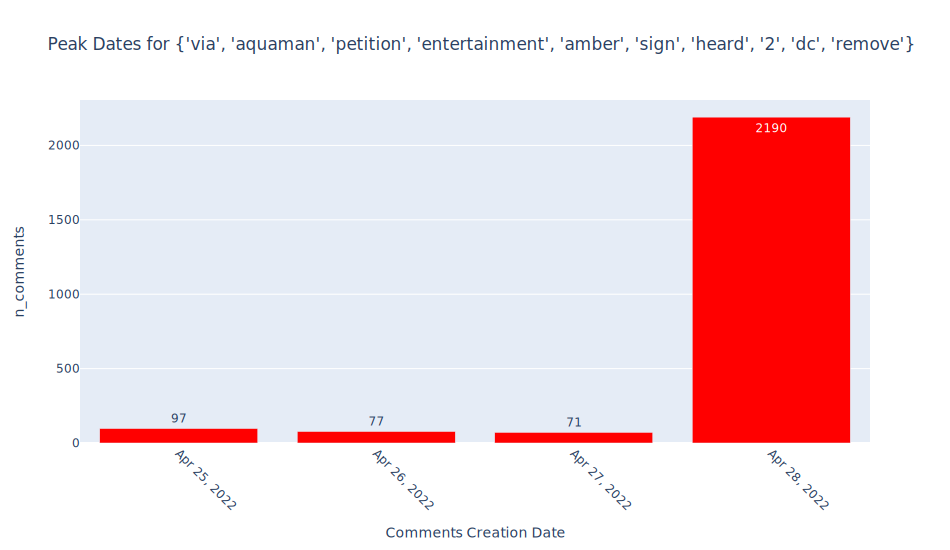

In [110]:
dc.peak(4)

In [111]:
dc.get_times()

1974 tweets from 2825 tweets made in less than 1 min from previous tweet by 1916 users


In [112]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
5889,1480746013962817537,2022-01-11 03:38:55+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[ChangePilipinas],1,[],0,1.027187e+08,gheldy16,...,justanothergirl || goingcrazy,"[justanothergirl, goingcrazy]",2022-01-11,2022.0,1.0,11.0,0 days 00:00:19,0.0,0.0,0.0
4663,1481200803620995072,2022-01-12 09:46:05+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[ChangeOrg_India],1,[],0,9.095964e+07,atmatman,...,NaN,NaN,2022-01-12,2022.0,1.0,12.0,0 days 00:00:11,0.0,0.0,0.0
2871,1481601521246740483,2022-01-13 12:18:24+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[Change],1,[],0,5.497290e+08,tskuninski,...,business inquiries: tskuninski@abv.bg,"[business, inquiries, tskuninski]",2022-01-13,2022.0,1.0,13.0,0 days 00:00:31,0.0,0.0,0.0
255813,1513885343984066564,2022-04-12 14:22:47+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[Change],1,[],0,3.407330e+08,JonPomplin,...,"owner declassified records. producer, bassist,...","[owner, declassified, records, producer, bassi...",2022-04-12,2022.0,4.0,12.0,0 days 00:00:44,0.0,0.0,0.0
438135,1514033390789570561,2022-04-13 00:11:04+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[Change],1,[],0,1.512066e+18,emma55161576,...,snap:emmarobbins21 instagram:emmarobbins2145 t...,"[snap, emmarobbins21, instagram, emmarobbins21...",2022-04-13,2022.0,4.0,13.0,0 days 00:00:32,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346994,1519827337453481986,2022-04-28 23:54:08+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[Change],1,[],0,2.532095e+09,AmericanBuddha8,...,"he/him brother, uncle, dreamer, streamer, yout...","[brother, uncle, dreamer, streamer, youtuber, ...",2022-04-28,2022.0,4.0,28.0,0 days 00:00:30,0.0,0.0,0.0
346956,1519827733957967872,2022-04-28 23:55:43+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[ChangeAUS],1,[],0,7.961561e+17,Talon_xExo101,...,NaN,NaN,2022-04-28,2022.0,4.0,28.0,0 days 00:00:21,0.0,0.0,0.0
346954,1519827777314332672,2022-04-28 23:55:53+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[CdnChange],1,[],0,9.294694e+17,OfficiallyEldon,...,actor living in his own world.\nwho am i really?,"[actor, living, world, really]",2022-04-28,2022.0,4.0,28.0,0 days 00:00:10,0.0,0.0,0.0
346953,1519827782452359168,2022-04-28 23:55:55+00:00,dc entertainment: remove amber heard from aqua...,"{via, aquaman, petition, entertainment, amber,...",[UKChange],1,[],0,2.910054e+09,georginajames__,...,NaN,NaN,2022-04-28,2022.0,4.0,28.0,0 days 00:00:02,0.0,0.0,0.0


In [113]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

5889     0 days 00:00:19
4663     0 days 00:00:11
2871     0 days 00:00:31
255813   0 days 00:00:44
438135   0 days 00:00:32
               ...      
346994   0 days 00:00:30
346956   0 days 00:00:21
346954   0 days 00:00:10
346953   0 days 00:00:02
346910   0 days 00:00:09
Name: diff, Length: 1974, dtype: timedelta64[ns]

In [114]:
len(dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

1916

In [115]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

Jaybee342          6
belizario20        3
eureka404s         3
Sweetieshortie2    3
InstinctSamM8      2
                  ..
letstweet921       1
Satans2ndWife      1
lopeslife39        1
MissPawrfect       1
davidbowierox      1
Name: user_name, Length: 1916, dtype: int64

In [116]:
dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-28    1934
2022-04-25      19
2022-04-23       7
2022-04-27       4
2022-04-26       3
2022-01-11       1
2022-01-12       1
2022-01-13       1
2022-04-12       1
2022-04-13       1
2022-04-22       1
2022-04-24       1
Name: date, dtype: int64

In [117]:
list(dc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['Jaybee342',
 'belizario20',
 'eureka404s',
 'Sweetieshortie2',
 'InstinctSamM8',
 'LColeman1998',
 'AnindyaBarua9',
 'MariaHatzi2',
 'RanjotRandhawa',
 'sherryblack2017',
 'theangelsofjay',
 'levis3331',
 'GetLifeBitch',
 'DomAshton4',
 'bruce483',
 'PrapulGowda9',
 'Melfleur1',
 'mssikana',
 'godconscious22',
 'nicola_nic1973',
 'Domingo92971253',
 '7mak89',
 'Rohan69696969v',
 'Rejuvinatez',
 'katy_lady',
 'AAAngelaJo1',
 'berrykaker',
 'Sassygirl05K55',
 'peykumori',
 'ShortiesTears',
 'chizzy201',
 'carlzday',
 'ma81349823',
 'johnwhitney79',
 'Mothmoon2',
 'Sarah_Smiff',
 'heyinej',
 'GabrielPerez58',
 'AdamW64622558',
 'julliianacf',
 'KRYSTAL1974',
 'J006006',
 'Seraphiiiiim',
 'liverbird0762',
 'ZhyeMinB',
 'ShalalaMeowMeow',
 'MeghanUnhinged',
 'KingOfNopes',
 'Richard80555331',
 'DyneZlayer',
 'strombergalice',
 'basiman50106673',
 'blondlinz',
 'shoutoutmyslime',
 'Michael_Schumer',
 'luishenry0',
 'Jax808',
 'jdbftbts',
 'Risha_Pineapple',
 'BrendanHeath45',
 'athenaxiix'

In [118]:
dc.get_df().mentions.value_counts()

[Change]                                                                        1863
[UKChange]                                                                       471
[CdnChange]                                                                      154
[ChangeOrg_India]                                                                100
[ChangeAUS]                                                                       69
                                                                                ... 
[ChangeOrg_India, MensDayOutIndia, MenMatterFdn, dnfiofkdn, DeepikaBhardwaj]       1
[DCComicsMovie, Change]                                                            1
[Change, Disney, DisneyStudios]                                                    1
[ChangeOrgRus]                                                                     1
[Change, BenAffleck, JASONMOMOA_TH]                                                1
Name: mentions, Length: 70, dtype: int64

In [119]:
dc.get_df().hashtags.value_counts()

[]                                                                                          2400
[JusticeForJohnnyDepp]                                                                        53
[JusticeForJohhnyDepp]                                                                        17
[JusticeForJohnny]                                                                             6
[JohnnyDeppVsAmberHeard]                                                                       5
                                                                                            ... 
[JusticeforJonnyDepp]                                                                          1
[AmberHeard]                                                                                   1
[JusticeForJohhnyDepp, AmberTurd, AmberHeardIsALiar, JohnnyDepp, JohnnyDeppVsAmberHeard]       1
[AmberTurd, JusticeForJohnnyDepp, AmberHeardIsAnAbuser, AmberHeardAbusedJohnnyDepp]            1
[JohnnyDeppDeservesJustice, St

<a id='gm'></a>
### good morining everyone except amber hear
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [120]:
values[values.tokens.apply(lambda x: len(values.tokens[4] - x) == 0)]

,tokens,n_tweets,n_tokens
4,"{morning, amber, heard, everyone, except, good}",391,6
887,"{morning, fuck, amber, heard, everyone, except...",12,7
1418,"{morning, except, bitch, amber, heard, everyon...",8,7
1606,"{morning, pinkett, except, everyone, smith, ja...",8,9
2062,"{morning, fuck, except, everyone, bitch, amber...",6,8
...,...,...,...
348380,"{morning, except, rot, amber, heard, everyone,...",1,7
354516,"{morning, except, amber, heard, everyone, lawy...",1,7
355265,"{morning, snyder, except, everyone, amber, sta...",1,8
355315,"{morning, except, colon, amber, heard, everyon...",1,7


In [121]:
gm = SameText(df_tweets_2022_prepared, values.tokens[4], True)

In [122]:
gm.get_stats()

This text appeared 600 in 251 shape from 591 users 


In [123]:
gm.get_metrics()

retweet_count    1348.0
reply_count       269.0
like_count       9864.0
quote_count        48.0
dtype: float64

In [124]:
gm.shapes(20)

good morning to everyone except amber heard                                                                                                        211
good morning to everyone except amber heard.                                                                                                        80
good morning to everyone, except amber heard                                                                                                        10
good morning everyone except amber heard                                                                                                             9
good morning to everyone, except amber heard.                                                                                                        9
good morning to everyone except for amber heard                                                                                                      8
good morning to everyone except amber heard and jada pinkett smith.                           

In [125]:
gm.dates()

2022-04-22    101
2022-04-21     88
2022-04-25     57
2022-04-23     54
2022-04-26     45
2022-04-27     45
2022-04-28     43
2022-04-20     39
2022-04-24     34
2022-04-19     22
2022-04-18     16
2022-04-16     16
2022-04-15     13
2022-04-14      8
2022-04-17      5
2022-04-13      3
2022-04-11      2
2022-03-21      2
2022-04-12      1
2022-02-11      1
2022-03-26      1
2022-03-25      1
2022-03-14      1
2022-02-02      1
2022-02-23      1
Name: date, dtype: int64

In [126]:
gm.get_df().id.value_counts()

1496525633001766915    1
1519705477269106688    1
1519703830677532672    1
1519702997395148800    1
1519701443359387648    1
                      ..
1519334148208537600    1
1519331295737925637    1
1519277574597353473    1
1519277535334477824    1
1515754608055967755    1
Name: id, Length: 600, dtype: int64

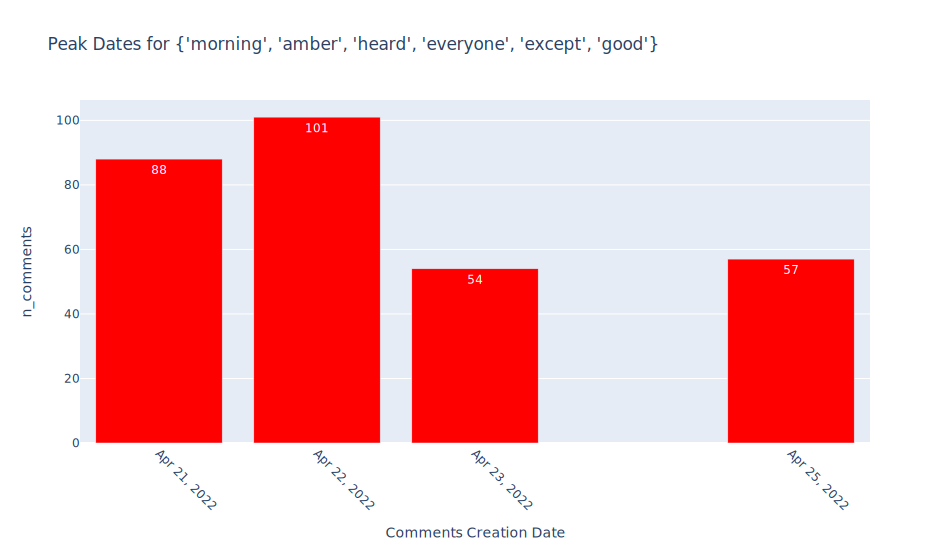

In [127]:
gm.peak(4)

In [128]:
gm.get_times()

54 tweets from 600 tweets made in less than 1 min from previous tweet by 54 users


In [129]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
69330,1515323775625175054,2022-04-16 13:38:36+00:00,good morning to everyone except amber heard.,"{morning, except, everyone, amber, heard, good}",[],0,[],0,1.337841e+18,mamakate92,...,mama and wife,"[mama, wife]",2022-04-16,2022.0,4.0,16.0,0 days 00:00:54,0.0,0.0,0.0
69329,1515323948040433664,2022-04-16 13:39:17+00:00,good morning to everyone except for amber heard,"{morning, except, everyone, amber, heard, good}",[],0,[],0,2.785079e+09,LazaretBro,...,go fuck yourself,"[go, fuck]",2022-04-16,2022.0,4.0,16.0,0 days 00:00:41,0.0,0.0,0.0
246805,1516757326245638144,2022-04-20 12:35:01+00:00,good morning to everyone except amber heard.,"{morning, except, everyone, amber, heard, good}",[],0,[],0,2.923173e+09,ViciousGiggles,...,blm ally-she/her-enfp ceo of not taking to jef...,"[blm, ceo, taking, jeff, donalddumped2020]",2022-04-20,2022.0,4.0,20.0,0 days 00:00:34,0.0,0.0,0.0
228320,1516781799879450625,2022-04-20 14:12:16+00:00,good morning to everyone except amber heard,"{morning, except, everyone, amber, heard, good}",[],0,[],0,3.054049e+09,z_lambiase,...,beep boop,"[beep, boop]",2022-04-20,2022.0,4.0,20.0,0 days 00:00:50,0.0,0.0,0.0
217025,1516797423833784323,2022-04-20 15:14:21+00:00,good morning to everyone except amber heard\nf...,"{morning, know, fuck, except, everyone, amber,...",[],0,[],0,8.874549e+17,asvinixo,...,my favourite colour is morally grey,"[favourite, colour, morally, grey]",2022-04-20,2022.0,4.0,20.0,0 days 00:00:02,0.0,0.0,0.0
126308,1517119988246659075,2022-04-21 12:36:06+00:00,good morning to everyone except amber heard.,"{morning, except, everyone, amber, heard, good}",[],0,[],0,2.723942e+07,caresselle,...,mom. professional hype girl. farm kid. lover o...,"[mom, professional, hype, girl, farm, kid, lov...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:34,0.0,0.0,0.0
566377,1517124875072200706,2022-04-21 12:55:31+00:00,good morning to everyone except amber heard,"{morning, except, everyone, amber, heard, good}",[],0,[],0,7.487138e+17,kasssierey,...,boy mom * coffee whore * aries,"[boy, mom, coffee, whore, aries]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:29,0.0,0.0,0.0
530882,1517127280262266883,2022-04-21 13:05:05+00:00,good morning to everyone except amber heard,"{morning, except, everyone, amber, heard, good}",[],0,[],0,7.441465e+08,Aaronsfreakflag,...,gaga stan.,"[gaga, stan]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:59,0.0,0.0,0.0
530394,1517131064447283204,2022-04-21 13:20:07+00:00,"good morning to everyone except amber heard, e...","{morning, anyone, except, everyone, tag, barlo...",[],0,"[IStandWithAmberHeard, JusticeForJohhnyDepp, J...",5,1.451247e+18,1qazxxsw2,...,NaN,NaN,2022-04-21,2022.0,4.0,21.0,0 days 00:00:25,0.0,0.0,0.0
530319,1517131657903497217,2022-04-21 13:22:28+00:00,good morning to everyone except amber heard.,"{morning, except, everyone, amber, heard, good}",[],0,[],0,1.452702e+18,spicyykiran,...,aggressively bisexual @kiran_khalsa,"[aggressively, bisexual]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:40,0.0,0.0,0.0


In [130]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

69330    0 days 00:00:54
69329    0 days 00:00:41
246805   0 days 00:00:34
228320   0 days 00:00:50
217025   0 days 00:00:02
126308   0 days 00:00:34
566377   0 days 00:00:29
530882   0 days 00:00:59
530394   0 days 00:00:25
530319   0 days 00:00:40
560863   0 days 00:00:56
560797   0 days 00:00:52
129978   0 days 00:00:53
113001   0 days 00:00:38
98502    0 days 00:00:50
98440    0 days 00:00:17
104488   0 days 00:00:13
132738   0 days 00:00:43
132281   0 days 00:00:21
103229   0 days 00:00:14
103216   0 days 00:00:31
101907   0 days 00:00:26
104968   0 days 00:00:56
104944   0 days 00:00:56
105032   0 days 00:00:49
147385   0 days 00:00:06
143040   0 days 00:00:24
143014   0 days 00:00:59
147944   0 days 00:00:25
412885   0 days 00:00:49
417857   0 days 00:00:57
415745   0 days 00:00:01
326133   0 days 00:00:44
326125   0 days 00:00:53
325946   0 days 00:00:29
312842   0 days 00:00:54
312456   0 days 00:00:10
307630   0 days 00:00:15
306732   0 days 00:00:03
302823   0 days 00:00:42


In [131]:
len(gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

54

In [132]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

mamakate92         1
bpdbellend         1
riananicole        1
philmint01         1
TheBronxxKid44     1
_angelique444      1
LoreleiOhMy        1
SoloMaracuchos     1
ItsMykro           1
notmarkhallman     1
keithontheradio    1
TheVFCastro        1
becca_nicole16     1
Shellbell123R      1
LazaretBro         1
its_laura_lou      1
siimplistiic04     1
carmprincess       1
lauublas           1
yunngtrashcan      1
madisonjo15        1
Grits_southern     1
abbys0ul_          1
OctobrsVryOwn7     1
AlexisBRhoads      1
lesliesalem2day    1
BrynTaelar_        1
halftime_hannah    1
bmariesdope        1
_SunSpirit         1
ViciousGiggles     1
z_lambiase         1
asvinixo           1
caresselle         1
kasssierey         1
Aaronsfreakflag    1
1qazxxsw2          1
spicyykiran        1
TearKneeeee        1
alydraculeaXIII    1
angiebv95          1
slbrown1994        1
Lit_tlemisss       1
thetinyGM          1
kimberlyyyvr       1
angelitamandaa     1
sstephanieelynn    1
msXsw        

In [133]:
gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-22    13
2022-04-25     8
2022-04-21     7
2022-04-27     6
2022-04-26     5
2022-04-23     4
2022-04-20     3
2022-04-24     3
2022-04-28     3
2022-04-16     2
Name: date, dtype: int64

In [134]:
list(gm.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['mamakate92',
 'bpdbellend',
 'riananicole',
 'philmint01',
 'TheBronxxKid44',
 '_angelique444',
 'LoreleiOhMy',
 'SoloMaracuchos',
 'ItsMykro',
 'notmarkhallman',
 'keithontheradio',
 'TheVFCastro',
 'becca_nicole16',
 'Shellbell123R',
 'LazaretBro',
 'its_laura_lou',
 'siimplistiic04',
 'carmprincess',
 'lauublas',
 'yunngtrashcan',
 'madisonjo15',
 'Grits_southern',
 'abbys0ul_',
 'OctobrsVryOwn7',
 'AlexisBRhoads',
 'lesliesalem2day',
 'BrynTaelar_',
 'halftime_hannah',
 'bmariesdope',
 '_SunSpirit',
 'ViciousGiggles',
 'z_lambiase',
 'asvinixo',
 'caresselle',
 'kasssierey',
 'Aaronsfreakflag',
 '1qazxxsw2',
 'spicyykiran',
 'TearKneeeee',
 'alydraculeaXIII',
 'angiebv95',
 'slbrown1994',
 'Lit_tlemisss',
 'thetinyGM',
 'kimberlyyyvr',
 'angelitamandaa',
 'sstephanieelynn',
 'msXsw',
 'heaathafeathaa',
 'leedle999',
 'zofiaskovajsova',
 'armon_mikal',
 'whisper2tcb3',
 'RibottoStudios']

In [135]:
gm.get_df().mentions.value_counts()

[]                          586
[realamberheard]              2
[Nerdy_Addict, BoxOMoxy]      1
[ScreenMix]                   1
[BTS_twt]                     1
[greg16676935420]             1
[jadapsmith]                  1
[YourBoyTippy]                1
[RonDeSantisFL]               1
[jezellex]                    1
[ThreeDailey]                 1
[NathanDahm]                  1
[aquamanmovie]                1
[KimKardashian]               1
Name: mentions, dtype: int64

In [136]:
gm.get_df().hashtags.value_counts()

[]                                                                                                                                       516
[JusticeForJohnnyDepp]                                                                                                                    21
[JusticeForJohnnyDeep]                                                                                                                     6
[JohnnyDeppDeservesJustice]                                                                                                                4
[IStandWithJohnnyDepp]                                                                                                                     3
[JusticeForJohhnyDepp]                                                                                                                     3
[JusticeForJohnny]                                                                                                                         3
[AmberTurd]  

<a id='aj'></a>
### amber heard johnny depp
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [137]:
values[values.tokens.apply(lambda x: len(values.tokens[7] - x) == 0)]

,tokens,n_tweets,n_tokens
7,{love},256,1
31,"{love, daily, tweet, johnny, depp}",96,5
34,"{love, johnny}",94,2
99,"{see, love}",52,2
159,"{love, much}",38,2
...,...,...,...
359443,"{kink, love, humiliation}",1,3
359603,"{know, would, earth, look, amber, writing, mon...",1,16
359652,"{texts, cleaning, boy, thank, jd, deuters, mar...",1,19
359673,"{letter, think, loved, never, fartlow, writing...",1,21


In [138]:
aj = SameText(df_tweets_2022_prepared, values.tokens[7], False)

In [139]:
aj.get_stats()

This text appeared 256 in 155 shape from 221 users 


In [140]:
aj.get_metrics()

retweet_count     160.0
reply_count        41.0
like_count       1309.0
quote_count        25.0
dtype: float64

In [141]:
aj.shapes(18)

love this           22
i love him          14
love it             10
we love you         10
love it!             8
i love this man      6
love this!           5
love                 5
i love this!         5
love it.             4
i love you           4
i love him.          3
i love this          3
i love this man!     3
love you             3
love him             2
love this....        2
love this!!          2
Name: clean_text, dtype: int64

In [142]:
aj.dates()

2022-04-22    29
2022-04-21    27
2022-04-27    16
2022-04-13    15
2022-04-26    14
2022-04-11    14
2022-04-28    13
2022-04-23    13
2022-04-25    12
2022-04-12     8
2022-04-14     8
2022-04-19     6
2022-01-12     6
2022-04-20     6
2022-04-10     5
2022-04-18     4
2022-04-24     4
2022-01-11     4
2022-04-15     3
2022-01-14     3
2022-03-01     3
2022-04-17     2
2022-03-11     2
2022-02-15     2
2022-02-28     2
2022-03-16     2
2022-03-18     2
2022-04-09     2
2022-03-24     2
2022-01-18     1
2022-01-15     1
2022-01-31     1
2022-01-21     1
2022-02-22     1
2022-01-20     1
2022-04-03     1
2022-01-09     1
2022-01-06     1
2022-01-27     1
2022-01-29     1
2022-01-08     1
2022-02-08     1
2022-02-13     1
2022-02-03     1
2022-02-18     1
2022-03-21     1
2022-04-16     1
2022-04-07     1
2022-03-10     1
2022-03-15     1
2022-02-01     1
2022-03-12     1
2022-03-28     1
2022-03-02     1
2022-03-03     1
2022-02-12     1
Name: date, dtype: int64

In [143]:
aj.get_df().id.value_counts()

1482119586074013707    1
1482118198220623872    1
1518634108355850241    1
1518630911566299137    1
1518630708012584961    1
                      ..
1517390573635833856    1
1517342324677877762    1
1517496635479179266    1
1517496573671862272    1
1515738790228369419    1
Name: id, Length: 256, dtype: int64

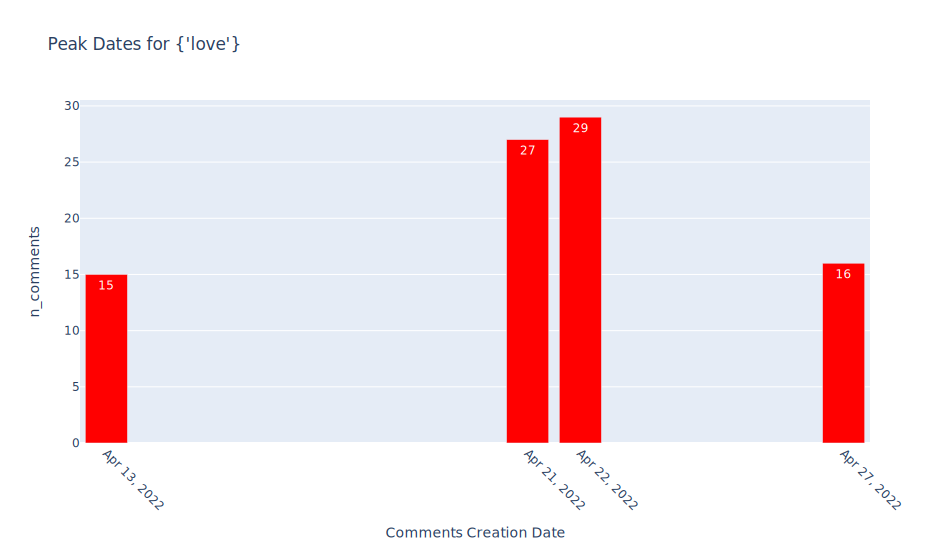

In [144]:
aj.peak(4)

In [145]:
aj.get_times()

5 tweets from 256 tweets made in less than 1 min from previous tweet by 5 users


In [146]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
132564,1517496573671862272,2022-04-22 13:32:31+00:00,i love this,{love},[],0,[JusticeForJohnnyDepp],1,1.373298e+18,realhuman1313,...,real human,"[real, human]",2022-04-22,2022.0,4.0,22.0,0 days 00:00:51,0.0,0.0,0.0
132556,1517496635479179266,2022-04-22 13:32:46+00:00,i love this,{love},[],0,[justiceforjohnnydepp],1,7.753553e+17,GellertDepp,...,"""period, full stop, nada.""","[period, full, stop]",2022-04-22,2022.0,4.0,22.0,0 days 00:00:15,0.0,0.0,0.0
301750,1518630911566299137,2022-04-25 16:39:58+00:00,we love you,{love},[],0,"[JohnnyDeppIsInnocent, JusticeForJohnnyDepp]",2,1.483903e+18,omarisdancer,...,dancer.teacher.dreamer.lover\nmade in the domi...,"[made, dominican, republic]",2022-04-25,2022.0,4.0,25.0,0 days 00:00:48,0.0,0.0,0.0
308983,1518677339000901632,2022-04-25 19:44:27+00:00,love this!! https://t.co/3gb2nekni8,{love},[AdaSaliArtistry],1,"[TeamJohnnyDepp, AmberHeardIsAnAbuser, AmberHe...",4,1.095232e+18,PB101212,...,"mom and grandma, my children and my grandbabie...","[mom, grandma, children, grandbabies, life, re...",2022-04-25,2022.0,4.0,25.0,0 days 00:00:38,0.0,0.0,0.0
212617,1519320896724508672,2022-04-27 14:21:44+00:00,i love him too!,{love},[],0,"[JohnnyDepp, JusticeForJohnnyDepp]",2,3.551855e+07,campbedream,...,#justiceforjohnnydepp,[justiceforjohnnydepp],2022-04-27,2022.0,4.0,27.0,0 days 00:00:09,0.0,0.0,0.0


In [147]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

132564   0 days 00:00:51
132556   0 days 00:00:15
301750   0 days 00:00:48
308983   0 days 00:00:38
212617   0 days 00:00:09
Name: diff, dtype: timedelta64[ns]

In [148]:
len(aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

5

In [149]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

realhuman1313    1
GellertDepp      1
omarisdancer     1
PB101212         1
campbedream      1
Name: user_name, dtype: int64

In [150]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-22    2
2022-04-25    2
2022-04-27    1
Name: date, dtype: int64

In [151]:
list(aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['realhuman1313', 'GellertDepp', 'omarisdancer', 'PB101212', 'campbedream']

In [152]:
aj.get_df().mentions.value_counts()

[]                             189
[johndeppwarrior]                2
[Izze1122]                       2
[An_elf_pirate]                  2
[jdeppjustice]                   2
                              ... 
[JohnnyDeppNFT]                  1
[lunarod]                        1
[Fleee118, milanicosmetics]      1
[milanicosmetics]                1
[RealmofSevens]                  1
Name: mentions, Length: 64, dtype: int64

In [153]:
aj.get_df().hashtags.value_counts()

[JusticeForJohnnyDepp]                                                                                           137
[JohnnyDepp, JusticeForJohnnyDepp]                                                                                10
[justiceforjohnnydepp]                                                                                             6
[]                                                                                                                 5
[JusticeForJohnnyDepp, JohnnyDepp]                                                                                 5
                                                                                                                ... 
[JusticeForJohnnyDepp, JohnnyDepp, JusticeForJohnnyDeppVirginia2022]                                               1
[DeppWarriorsGroupHug, JusticeForJohnnyDepp]                                                                       1
[JusticeForJohnnyDepp, JusticeForJohnnyDeppVirginia2022, AbuseHa

<a id='ho'></a>
### homies hate amber heard
<ul>
<li><a href="#jd">johnny depp</a></li>
<li><a href="#ah">amber heard</a></li>
<li><a href="#f">f*ck amber heard</a></li>
<li><a href="#dc">remove amber heard from aquaman 2</a></li>
<li><a href="#gm">good morining everyone except amber heard</a></li>
<li><a href="#aj">amber heard johnny depp</a></li>
<li><a href="#ho">homies hate amber heard</a></li>


</ul>


In [154]:
values[values.tokens.apply(lambda x: len(values.tokens[9] - x) == 0)]

,tokens,n_tweets,n_tokens
9,"{fuck, hate, amber, homies, heard}",225,5
1437,"{bitch, fuck, hate, amber, homies, heard}",8,6
4966,"{fuck, hate, amber, homies, heard, fr}",3,6
5882,"{fuck, hate, amber, homies, heard, ayo}",3,6
51047,"{fuck, hate, favor, depp, heard, amber, case, ...",1,11
51622,"{fuck, hate, amber, homies, heard, ambar}",1,6
88661,"{fuck, hate, amber, homies, heard, fucking}",1,6
91703,"{fuck, hate, lmaoo, amber, homies, heard}",1,6
93301,"{fuck, hate, johnny, justice, amber, homies, h...",1,8
101349,"{head, eyes, abuse, abused, domestic, amber, p...",1,22


In [155]:
h = SameText(df_tweets_2022_prepared, values.tokens[9], True)

In [156]:
h.get_stats()

This text appeared 276 in 108 shape from 274 users 


In [157]:
h.get_metrics()

retweet_count     408.0
reply_count        82.0
like_count       2519.0
quote_count        18.0
dtype: float64

In [159]:
h.shapes(25)

fuck amber heard all my homies hate amber heard                               61
fuck amber heard, all my homies hate amber heard                              34
fuck amber heard. all my homies hate amber heard.                             19
fuck amber heard. all my homies hate amber heard                              18
fuck amber heard\nall my homies hate amber heard                              11
fuck amber heard all the homies hate amber heard                              10
fuck amber heard. all the homies hate amber heard                              4
fuck amber heard, me and my homies hate amber heard                            4
fuck amber heard, all my homies hate amber heard.                              4
fuck amber heard me and my homies hate amber heard                             4
fuck amber heard! all my homies hate amber heard!                              3
fuck amber heard. all the homies hate amber heard.                             3
fuck amber heard me and all 

In [160]:
h.dates()

2022-04-21    81
2022-04-22    44
2022-04-20    26
2022-04-14    18
2022-04-23    15
2022-04-19    12
2022-04-27    11
2022-04-26     9
2022-04-25     9
2022-04-24     7
2022-04-12     7
2022-04-15     6
2022-04-13     5
2022-04-18     4
2022-04-28     4
2022-04-17     4
2022-04-06     2
2022-04-11     2
2022-01-19     1
2022-04-10     1
2022-04-07     1
2022-04-16     1
2022-03-17     1
2022-03-11     1
2022-02-21     1
2022-01-20     1
2022-04-04     1
2022-01-30     1
Name: date, dtype: int64

In [161]:
h.get_df().id.value_counts()

1487833795340374019    1
1514732574085718017    1
1514431026944172033    1
1514682193066573826    1
1514692705053515781    1
                      ..
1516821076616962050    1
1516820797578530821    1
1516927718906109955    1
1516925988621283328    1
1515693246982283267    1
Name: id, Length: 276, dtype: int64

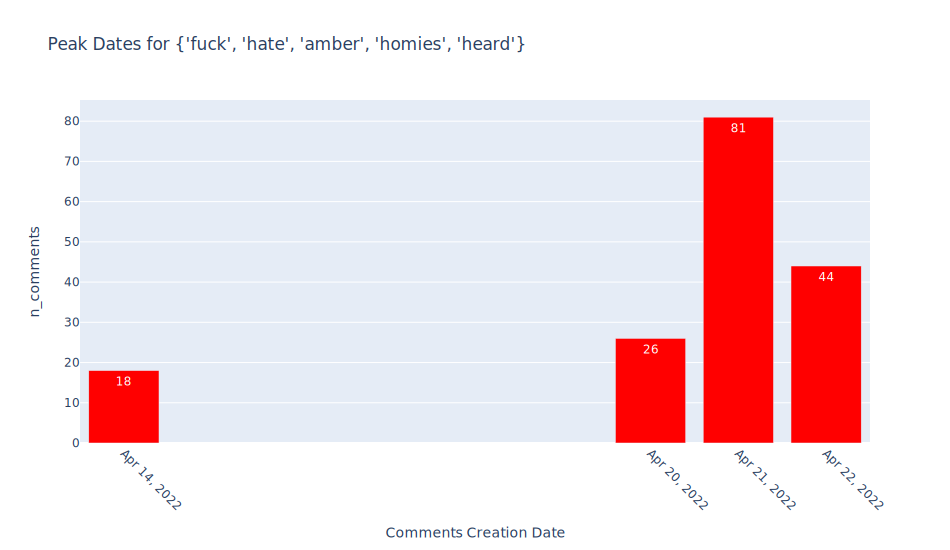

In [162]:
h.peak(4)

In [163]:
h.get_times()

9 tweets from 276 tweets made in less than 1 min from previous tweet by 9 users


In [164]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
152869,1514000706914570244,2022-04-12 22:01:11+00:00,"fuck amber heard, all my homies hate amber heard","{fuck, hate, amber, homies, heard}",[],0,[],0,9.590204e+17,Ceballosaraus,...,"no matter where life takes me, find me with a ...","[matter, life, takes, find, smile]",2022-04-12,2022.0,4.0,12.0,0 days 00:00:11,0.0,0.0,0.0
227302,1516788718064967686,2022-04-20 14:39:45+00:00,fuck amber heard. all my homies hate amber heard.,"{fuck, hate, amber, homies, heard}",[],0,[],0,9.257644e+17,alm1ghtyadri,...,20,[20],2022-04-20,2022.0,4.0,20.0,0 days 00:00:40,0.0,0.0,0.0
542784,1517001084048494593,2022-04-21 04:43:37+00:00,fuck amber heard all my homies hate amber heard,"{fuck, hate, amber, homies, heard}",[],0,[],0,1.219094e+18,qveenofdisastxr,...,she/her,[],2022-04-21,2022.0,4.0,21.0,0 days 00:00:39,0.0,0.0,0.0
526428,1517019363638792192,2022-04-21 05:56:15+00:00,ayo fuck amber heard all the homies hate amber...,"{fuck, hate, amber, homies, heard, ayo}",[],0,[],0,2.902254e+09,halalbil,...,ugly human,"[ugly, human]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:18,0.0,0.0,0.0
538037,1517108458985865216,2022-04-21 11:50:17+00:00,fuck amber heard me and my homies hate amber h...,"{fuck, hate, amber, homies, heard}",[],0,[],0,9.200620e+17,badjdb,...,i would walk through burning fire even if your...,"[would, walk, burning, fire, even, kiss, could...",2022-04-21,2022.0,4.0,21.0,0 days 00:00:15,0.0,0.0,0.0
529860,1517135089267884032,2022-04-21 13:36:06+00:00,fuck amber heard. all my homies hate amber heard.,"{fuck, hate, amber, homies, heard}",[],0,[],0,2.232494e+09,fckarlov,...,you ever met joe,"[ever, joe]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:59,0.0,0.0,0.0
544545,1517284640934879232,2022-04-21 23:30:22+00:00,ayo fuck amber heard me & my homies hate amber...,"{fuck, hate, amber, homies, heard, ayo}",[],0,[],0,2.877260e+09,hazysunfl0wer,...,paz y amor,"[paz, amor]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:45,0.0,0.0,0.0
544343,1517286244794966017,2022-04-21 23:36:45+00:00,fuck amber heard\nall my homies hate amber heard,"{fuck, hate, amber, homies, heard}",[],0,[],0,5.667530e+08,LKSherms,...,leo libra pisces |,"[leo, libra, pisces]",2022-04-21,2022.0,4.0,21.0,0 days 00:00:47,0.0,0.0,0.0
130552,1517349762323812352,2022-04-22 03:49:08+00:00,fuck amber heard ! all my homies hate amber heard,"{fuck, hate, amber, homies, heard}",[],0,[],0,4.497245e+09,karrellou,...,aum,[aum],2022-04-22,2022.0,4.0,22.0,0 days 00:00:27,0.0,0.0,0.0


In [165]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

152869   0 days 00:00:11
227302   0 days 00:00:40
542784   0 days 00:00:39
526428   0 days 00:00:18
538037   0 days 00:00:15
529860   0 days 00:00:59
544545   0 days 00:00:45
544343   0 days 00:00:47
130552   0 days 00:00:27
Name: diff, dtype: timedelta64[ns]

In [166]:
len(h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

9

In [167]:
h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

Ceballosaraus      1
alm1ghtyadri       1
qveenofdisastxr    1
halalbil           1
badjdb             1
fckarlov           1
hazysunfl0wer      1
LKSherms           1
karrellou          1
Name: user_name, dtype: int64

In [168]:
aj.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-04-22    2
2022-04-25    2
2022-04-27    1
Name: date, dtype: int64

In [169]:
list(h.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['Ceballosaraus',
 'alm1ghtyadri',
 'qveenofdisastxr',
 'halalbil',
 'badjdb',
 'fckarlov',
 'hazysunfl0wer',
 'LKSherms',
 'karrellou']

In [170]:
h.get_df().mentions.value_counts()

[]                  274
[DiscussingFilm]      1
[survivor_h_f]        1
Name: mentions, dtype: int64

In [171]:
h.get_df().hashtags.value_counts()

[]                                                   263
[JusticeForJohnnyDepp]                                 6
[JusticeForJohnnyDeep]                                 2
[IStandWithJohnnyDepp]                                 1
[JusticeForJohhnyDepp, AmberHeardIsALiar]              1
[JohnnyDeppIsInnocent, JohnnyDeppDeservesJustice]      1
[JusticeForJohhnyDepp]                                 1
[AmberHeardIsAnAbuser, JusticeForJohnnyDeep]           1
Name: hashtags, dtype: int64

## Long repeated text

In [172]:
values[values.n_tokens > 5].head(10)

,tokens,n_tweets,n_tokens
3,"{via, aquaman, petition, entertainment, amber,...",2434,10
4,"{morning, amber, heard, everyone, except, good}",391,6
6,"{via, dc, firma, aquaman, entertainment, amber...",296,10
10,"{comics, portrayed, extended, characters, univ...",189,15
22,"{via, aquaman, entertainment, amber, heard, 2,...",131,8
25,"{evidence, justice, continuing, firing, proven...",106,22
32,"{dc, firma, aquaman, entertainment, traves, am...",96,10
33,"{without, promoted, whose, supported, going, w...",95,7
40,"{soon, darkness, 2010, amber, stephanie, heard}",85,6
44,"{testified, disorder, borderline, actor, news,...",79,15


In [176]:
values.tokens[10]

{'amber',
 'appreciative',
 'characters',
 'comics',
 'dc',
 'extended',
 'favourite',
 'heard',
 'latest',
 'mera',
 'namely',
 'portrayed',
 'queen',
 'tweet',
 'universe'}

<a id='q'></a>
### queen mera as portrayed
<ul>
<li><a href="#q">queen mera as portrayed</a></li>
<li><a href="#bs">my brothers, my sisters. the clock is ticking faster</a></li>
<li><a href="#su">supported and promoted an abuser</a></li>



</ul>


In [177]:
values[values.tokens.apply(lambda x: len(values.tokens[10] - x) == 0)]

,tokens,n_tweets,n_tokens
10,"{comics, portrayed, extended, characters, univ...",189,15


In [178]:
q = SameText(df_tweets_2022_prepared, str(values.tokens[10]), False)

In [179]:
q.get_stats()

This text appeared 189 in 189 shape from 1 users 


In [180]:
q.get_metrics()

retweet_count    540.0
reply_count       18.0
like_count       763.0
quote_count       14.0
dtype: float64

In [181]:
q.shapes(18)

here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/qsjc3rrgzy    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/vedyktoszy    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/71bkaojhnx    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/7ivnuptqiw    1
here is my latest appreciative tweet for one of my favourite dc comics extended universe characters namely queen mera as portrayed by amber heard\n\n\n\n https://t.co/zyu4cv7sgk    1
here is my latest appreciative tweet for one of my favourite dc comics extended unive

In [182]:
q.dates()

2022-03-22    9
2022-04-10    6
2022-02-01    6
2022-04-25    6
2022-02-16    6
             ..
2022-03-06    1
2022-03-25    1
2022-03-26    1
2022-03-04    1
2022-03-02    1
Name: date, Length: 78, dtype: int64

In [183]:
q.get_df().id.value_counts()

1482516759148220421    1
1504994931382882305    1
1502120406827905028    1
1503547122389508097    1
1503697360278409217    1
                      ..
1494095582251659266    1
1494095461157855237    1
1494095388403503104    1
1494095288486748168    1
1515782862447992833    1
Name: id, Length: 189, dtype: int64

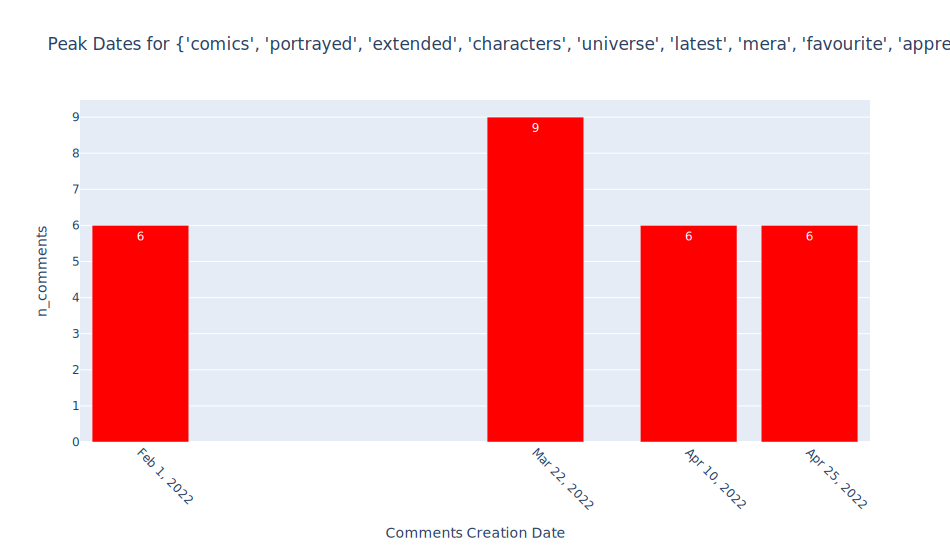

In [184]:
q.peak(4)

In [185]:
q.get_times()

74 tweets from 189 tweets made in less than 1 min from previous tweet by 1 users


In [186]:
q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
17499,1478108844668723200,2022-01-03 20:59:45+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-01-03,2022.0,1.0,3.0,0 days 00:00:14,0.0,0.0,0.0
17498,1478108932740730884,2022-01-03 21:00:06+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-01-03,2022.0,1.0,3.0,0 days 00:00:21,0.0,0.0,0.0
14394,1483024580331593728,2022-01-17 10:33:07+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-01-17,2022.0,1.0,17.0,0 days 00:00:28,0.0,0.0,0.0
7606,1483256118721880064,2022-01-18 01:53:10+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-01-18,2022.0,1.0,18.0,0 days 00:00:23,0.0,0.0,0.0
11642,1483601368451538944,2022-01-19 00:45:04+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-01-19,2022.0,1.0,19.0,0 days 00:00:17,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224668,1516925825693667333,2022-04-20 23:44:34+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-04-20,2022.0,4.0,20.0,0 days 00:00:33,0.0,0.0,0.0
305614,1518390685052948480,2022-04-25 00:45:24+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-04-25,2022.0,4.0,25.0,0 days 00:00:19,0.0,0.0,0.0
305611,1518390748961513477,2022-04-25 00:45:39+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-04-25,2022.0,4.0,25.0,0 days 00:00:15,0.0,0.0,0.0
305608,1518390811976740866,2022-04-25 00:45:54+00:00,here is my latest appreciative tweet for one o...,"{comics, portrayed, universe, latest, mera, fa...",[],0,"[AmberHeard, QueenMera, DCComics, DCComicsFore...",4,7.937921e+17,TheTartanDalek,...,scots fun lover - loves all things supermarion...,"[scots, fun, lover, loves, things, supermarion...",2022-04-25,2022.0,4.0,25.0,0 days 00:00:15,0.0,0.0,0.0


In [187]:
q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

17499    0 days 00:00:14
17498    0 days 00:00:21
14394    0 days 00:00:28
7606     0 days 00:00:23
11642    0 days 00:00:17
               ...      
224668   0 days 00:00:33
305614   0 days 00:00:19
305611   0 days 00:00:15
305608   0 days 00:00:15
314386   0 days 00:00:59
Name: diff, Length: 74, dtype: timedelta64[ns]

In [188]:
len(q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

1

In [189]:
q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

TheTartanDalek    74
Name: user_name, dtype: int64

In [190]:
q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-03-22    5
2022-04-25    4
2022-02-16    4
2022-02-24    3
2022-04-17    3
2022-04-10    3
2022-04-02    3
2022-02-01    3
2022-02-07    3
2022-02-15    3
2022-03-16    3
2022-03-15    3
2022-04-20    2
2022-03-29    2
2022-03-27    2
2022-03-17    2
2022-01-03    2
2022-01-19    2
2022-01-20    2
2022-02-25    1
2022-03-05    1
2022-01-18    1
2022-04-19    1
2022-04-13    1
2022-04-07    1
2022-01-22    1
2022-01-23    1
2022-01-26    1
2022-02-13    1
2022-03-20    1
2022-03-19    1
2022-03-18    1
2022-02-14    1
2022-02-17    1
2022-02-23    1
2022-03-13    1
2022-03-11    1
2022-01-17    1
2022-03-08    1
Name: date, dtype: int64

In [191]:
list(q.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['TheTartanDalek']

In [192]:
q.get_df().mentions.value_counts()

[]    189
Name: mentions, dtype: int64

In [193]:
q.get_df().hashtags.value_counts()

[AmberHeard, QueenMera, DCComics, DCComicsForever]                           188
[AmberHeard, QueenMera, GalGadot, WonderWoman, DCComics, DCComicsForever]      1
Name: hashtags, dtype: int64

<a id='bs'></a>
### qmy brothers, my sisters. the clock is ticking faster
<ul>
<li><a href="#q">queen mera as portrayed</a></li>
<li><a href="#bs">my brothers, my sisters. the clock is ticking faster</a></li>
    <li><a href="#su">supported and promoted an abuser</a></li>




</ul>


In [227]:
values[values.n_tokens > 4].head(20)

,tokens,n_tweets,n_tokens
3,"{via, aquaman, petition, entertainment, amber,...",2434,10
4,"{morning, amber, heard, everyone, except, good}",391,6
6,"{via, dc, firma, aquaman, entertainment, amber...",296,10
9,"{fuck, hate, amber, homies, heard}",225,5
10,"{comics, portrayed, extended, characters, univ...",189,15
22,"{via, aquaman, entertainment, amber, heard, 2,...",131,8
25,"{evidence, justice, continuing, firing, proven...",106,22
31,"{love, daily, tweet, johnny, depp}",96,5
32,"{dc, firma, aquaman, entertainment, traves, am...",96,10
33,"{without, promoted, whose, supported, going, w...",95,7


In [205]:
values.tokens[25]

{'abuser',
 'accountable',
 'amber',
 'brothers',
 'clock',
 'continuing',
 'depp',
 'employ',
 'evidence',
 'faster',
 'firing',
 'heard',
 'hold',
 'johnny',
 'justice',
 'live',
 'moment',
 'proven',
 'sisters',
 'ticking',
 'truth',
 'warner'}

In [207]:
values[values.tokens.apply(lambda x: len(values.tokens[25] -x)) == 0]

,tokens,n_tweets,n_tokens
25,"{evidence, justice, continuing, firing, proven...",106,22


In [208]:
b = SameText(df_tweets_2022_prepared, str(values.tokens[25]), False)

In [212]:
b.get_stats()

This text appeared 106 in 106 shape from 1 users 


In [213]:
b.get_metrics()

retweet_count     343.0
reply_count        47.0
like_count       1718.0
quote_count        39.0
dtype: float64

In [214]:
b.shapes(18)

"my brothers, my sisters. the clock is ticking faster....we who live, for truth, for [justice]. the moment has come, to [hold warner brothers accountable for firing evidence proven victim/survivor johnny depp, while continuing to employ his evidence proven abuser, amber heard]. https://t.co/actpibhsjc    1
"my brothers, my sisters. the clock is ticking faster....we who live, for truth, for [justice]. the moment has come, to [hold warner brothers accountable for firing evidence proven victim/survivor johnny depp, while continuing to employ his evidence proven abuser, amber heard]. https://t.co/uorye6elqi    1
"my brothers, my sisters. the clock is ticking faster....we who live, for truth, for [justice]. the moment has come, to [hold warner brothers accountable for firing evidence proven victim/survivor johnny depp, while continuing to employ his evidence proven abuser, amber heard]. https://t.co/ibjdvykr8o    1
"my brothers, my sisters. the clock is ticking faster....we who live, for tr

In [215]:
b.dates()

2022-03-08    6
2022-03-03    5
2022-04-06    5
2022-02-25    5
2022-04-04    4
2022-03-12    4
2022-03-11    4
2022-03-28    4
2022-02-21    4
2022-03-17    3
2022-03-31    3
2022-02-09    3
2022-04-08    3
2022-03-30    3
2022-03-15    2
2022-04-05    2
2022-03-27    2
2022-03-22    2
2022-03-26    2
2022-03-25    2
2022-03-18    2
2022-01-01    2
2022-02-27    2
2022-03-21    2
2022-03-29    2
2022-03-09    2
2022-03-24    2
2022-03-02    1
2022-04-01    1
2022-04-03    1
2022-04-09    1
2022-01-14    1
2022-02-22    1
2022-02-24    1
2022-04-07    1
2022-04-11    1
2022-02-23    1
2022-03-16    1
2022-02-28    1
2022-02-17    1
2022-02-26    1
2022-02-08    1
2022-03-01    1
2022-02-16    1
2022-03-05    1
2022-03-04    1
2022-03-13    1
2022-03-23    1
2022-01-07    1
2022-03-14    1
2022-03-07    1
Name: date, dtype: int64

In [216]:
b.get_df().id.value_counts()

1477357337711157250    1
1504851840030158851    1
1503763943944302593    1
1503878101113225221    1
1502320130801520642    1
                      ..
1501695540131684356    1
1501289493109915653    1
1501289585501827072    1
1501219773077762048    1
1511107243252625408    1
Name: id, Length: 106, dtype: int64

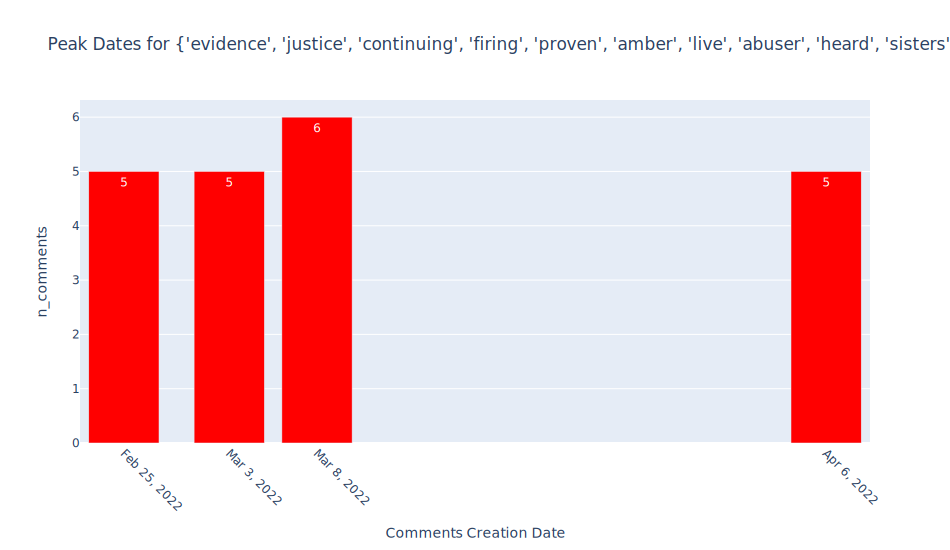

In [217]:
b.peak(4)

In [218]:
b.get_times()

29 tweets from 106 tweets made in less than 1 min from previous tweet by 1 users


In [219]:
b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
7096,1477357337711157250,2022-01-01 19:13:31+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[],0,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-01-01,2022.0,1.0,1.0,0 days 00:00:52,0.0,0.0,0.0
19599,1491469916758757381,2022-02-09 17:51:52+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[BeastsMovieUK],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-09,2022.0,2.0,9.0,0 days 00:00:19,0.0,0.0,0.0
24201,1495859783903100940,2022-02-21 20:35:38+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[FantasticBeasts],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-21,2022.0,2.0,21.0,0 days 00:00:22,0.0,0.0,0.0
24199,1495859938534608900,2022-02-21 20:36:15+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[BeastsMovieUK],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-21,2022.0,2.0,21.0,0 days 00:00:37,0.0,0.0,0.0
24198,1495860030444298243,2022-02-21 20:36:37+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[BeastsMovieUK],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-21,2022.0,2.0,21.0,0 days 00:00:22,0.0,0.0,0.0
21795,1497004947161993227,2022-02-25 00:26:07+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[BeastsMovieUK],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-25,2022.0,2.0,25.0,0 days 00:00:29,0.0,0.0,0.0
21794,1497005097745850371,2022-02-25 00:26:42+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[],0,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-25,2022.0,2.0,25.0,0 days 00:00:35,0.0,0.0,0.0
25928,1498013674027589634,2022-02-27 19:14:26+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...","[BeastsMovieUK, BBCOne]",2,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-02-27,2022.0,2.0,27.0,0 days 00:00:39,0.0,0.0,0.0
46034,1499419096848515079,2022-03-03 16:19:05+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...","[BeastsMovieUK, BloomsburyBooks, WorldBookDayU...",6,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-03-03,2022.0,3.0,3.0,0 days 00:00:20,0.0,0.0,0.0
46033,1499419180206071808,2022-03-03 16:19:25+00:00,"""my brothers, my sisters. the clock is ticking...","{evidence, justice, continuing, firing, proven...",[BeastsMovieUK],1,[],0,1.262919e+18,roaringrapids22,...,"fairfax, virginia: johnny depp v. amber heard....","[fairfax, virginia, johnny, depp, amber, heard...",2022-03-03,2022.0,3.0,3.0,0 days 00:00:20,0.0,0.0,0.0


In [220]:
b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

7096     0 days 00:00:52
19599    0 days 00:00:19
24201    0 days 00:00:22
24199    0 days 00:00:37
24198    0 days 00:00:22
21795    0 days 00:00:29
21794    0 days 00:00:35
25928    0 days 00:00:39
46034    0 days 00:00:20
46033    0 days 00:00:20
46032    0 days 00:00:16
40863    0 days 00:00:23
40862    0 days 00:00:23
40860    0 days 00:00:38
41354    0 days 00:00:22
60848    0 days 00:00:24
60847    0 days 00:00:26
60846    0 days 00:00:22
57199    0 days 00:00:27
57197    0 days 00:00:29
57195    0 days 00:00:22
53082    0 days 00:00:21
60206    0 days 00:00:19
47915    0 days 00:00:22
47914    0 days 00:00:24
65161    0 days 00:00:22
568475   0 days 00:00:20
330143   0 days 00:00:21
330142   0 days 00:00:22
Name: diff, dtype: timedelta64[ns]

In [221]:
len(b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

1

In [222]:
b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

roaringrapids22    29
Name: user_name, dtype: int64

In [223]:
b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-03-08    4
2022-02-21    3
2022-03-03    3
2022-03-11    3
2022-03-12    3
2022-02-25    2
2022-03-28    2
2022-04-06    2
2022-01-01    1
2022-02-09    1
2022-02-27    1
2022-03-26    1
2022-03-27    1
2022-03-31    1
2022-04-04    1
Name: date, dtype: int64

In [224]:
list(b.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['roaringrapids22']

In [225]:
b.get_df().mentions.value_counts()

[BeastsMovieUK]                                                                                   28
[FantasticBeasts]                                                                                 18
[]                                                                                                10
[FantasticBeasts, wizardingworld]                                                                  6
[FantasticBeasts, wbpictures]                                                                      4
[BeastsMovieUK, comicrelief]                                                                       2
[VictoriaYeates]                                                                                   2
[BeastsMovieUK, Rubies_UK]                                                                         2
[FantasticBeasts, anamassoneti]                                                                    2
[FantasticBeasts, lumoskarasuno]                                                           

In [226]:
b.get_df().hashtags.value_counts()

[]    106
Name: hashtags, dtype: int64

<a id='su'></a>
### supported and promoted an abuser
<ul>
<li><a href="#q">queen mera as portrayed</a></li>
<li><a href="#bs">my brothers, my sisters. the clock is ticking faster</a></li>
<li><a href="#su">supported and promoted an abuser</a></li>


</ul>


In [227]:
values[values.n_tokens > 4].head(20)

,tokens,n_tweets,n_tokens
3,"{via, aquaman, petition, entertainment, amber,...",2434,10
4,"{morning, amber, heard, everyone, except, good}",391,6
6,"{via, dc, firma, aquaman, entertainment, amber...",296,10
9,"{fuck, hate, amber, homies, heard}",225,5
10,"{comics, portrayed, extended, characters, univ...",189,15
22,"{via, aquaman, entertainment, amber, heard, 2,...",131,8
25,"{evidence, justice, continuing, firing, proven...",106,22
31,"{love, daily, tweet, johnny, depp}",96,5
32,"{dc, firma, aquaman, entertainment, traves, am...",96,10
33,"{without, promoted, whose, supported, going, w...",95,7


In [228]:
values.tokens[33]

{'abuser', 'going', 'promoted', 'supported', 'watch', 'whose', 'without'}

In [229]:
values[values.tokens.apply(lambda x: len(values.tokens[33] -x)) == 0]

,tokens,n_tweets,n_tokens
33,"{without, promoted, whose, supported, going, w...",95,7
13850,"{1, supported, whose, watch, without, promoted...",2,8
78871,"{tell, whose, supported, watch, without, promo...",1,8
153120,"{maybe, whose, hard, supported, enough, watch,...",1,11
185322,"{make, sure, whose, supported, watch, without,...",1,12
188806,"{coma, whose, supported, going, watch, without...",1,12
189060,"{expressions, whose, supported, elaine, johnny...",1,11
189499,"{supported, whose, watch, 2, without, promoted...",1,8
200251,"{knows, whose, supported, going, watch, withou...",1,10
200573,"{whose, supported, abuser, started, watch, wit...",1,12


In [230]:
s = SameText(df_tweets_2022_prepared, str(values.tokens[33]), False)

In [231]:
s.get_stats()

This text appeared 96 in 12 shape from 1 users 


In [232]:
s.get_metrics()

retweet_count     6.0
reply_count       3.0
like_count       65.0
quote_count       6.0
dtype: float64

In [233]:
s.shapes(18)

. without  whose going to watch.  supported and promoted an abuser.                             77
. without  whose going to watch.  supported and promoted an abuser.     .                        4
. without  whose going to watch.  supported and promoted an abuser.      .                       3
. . without  whose going to watch.  supported and promoted an abuser.                            3
/ . without  whose going to watch.  supported and promoted an abuser.                            2
. without  whose going to watch.  supported and promoted an abuser.     ,                        1
, . without  whose going to watch.  supported and promoted an abuser.                            1
you supported and promoted an abuser. so who will watch     . without  whose going to watch.     1
. . . without  whose going to watch.  supported and promoted an abuser.                          1
. / . without  whose going to watch.  supported and promoted an abuser.                          1
. without 

In [234]:
s.dates()

2022-04-02    10
2022-04-08     8
2022-03-31     7
2022-04-06     6
2022-04-11     5
2022-03-29     4
2022-04-10     4
2022-04-14     4
2022-04-13     4
2022-04-12     4
2022-04-09     4
2022-04-19     4
2022-04-01     3
2022-04-18     3
2022-04-20     3
2022-04-05     3
2022-03-27     3
2022-04-17     3
2022-04-16     2
2022-03-25     2
2022-04-04     2
2022-03-28     1
2022-04-15     1
2022-04-25     1
2022-04-27     1
2022-04-28     1
2022-04-23     1
2022-03-26     1
2022-04-03     1
Name: date, dtype: int64

In [235]:
s.get_df().id.value_counts()

1508794476814290946    1
1508739733052182536    1
1512498627608031237    1
1512498713993924609    1
1516180634233880589    1
                      ..
1510282939287937028    1
1510283212152610816    1
1510222488554385411    1
1510322500395323397    1
1515486836499496966    1
Name: id, Length: 96, dtype: int64

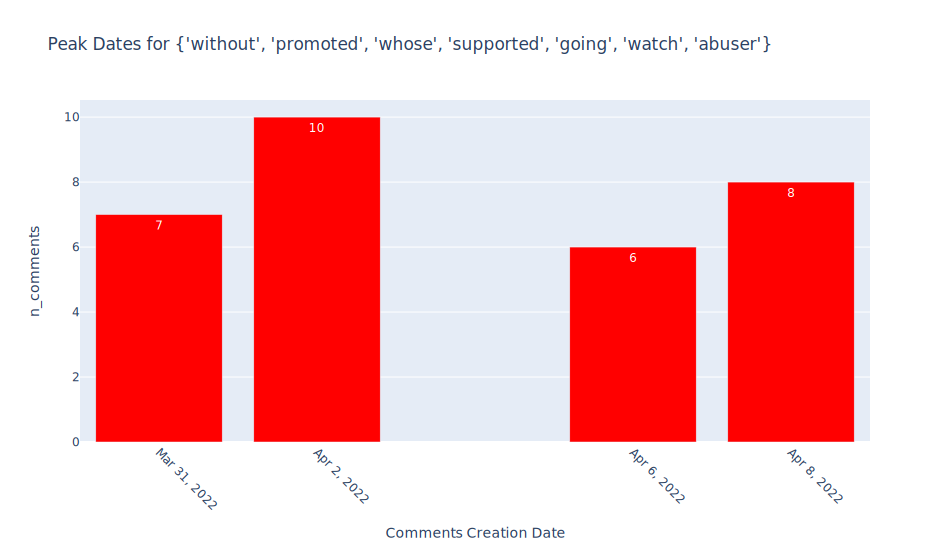

In [236]:
s.peak(4)

In [237]:
s.get_times()

12 tweets from 96 tweets made in less than 1 min from previous tweet by 1 users


In [238]:
s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,...,user_description,user_description_tokens,date,year,month,dayofmonth,diff,days,hours,minutes
64769,1509460021695950852,2022-03-31 09:18:08+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-03-31,2022.0,3.0,31.0,0 days 00:00:11,0.0,0.0,0.0
64768,1509460083775881220,2022-03-31 09:18:23+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-03-31,2022.0,3.0,31.0,0 days 00:00:15,0.0,0.0,0.0
64767,1509460173601099776,2022-03-31 09:18:44+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-03-31,2022.0,3.0,31.0,0 days 00:00:21,0.0,0.0,0.0
82497,1510282939287937028,2022-04-02 15:48:07+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-02,2022.0,4.0,2.0,0 days 00:00:33,0.0,0.0,0.0
82617,1510349655565078536,2022-04-02 20:13:13+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-02,2022.0,4.0,2.0,0 days 00:00:48,0.0,0.0,0.0
568462,1510994815089102853,2022-04-04 14:56:51+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-04,2022.0,4.0,4.0,0 days 00:00:32,0.0,0.0,0.0
406581,1512498418278674432,2022-04-08 18:31:38+00:00,",, . without whose going to watch. supported...","{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-08,2022.0,4.0,8.0,0 days 00:00:23,0.0,0.0,0.0
406577,1512498627608031237,2022-04-08 18:32:28+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-08,2022.0,4.0,8.0,0 days 00:00:50,0.0,0.0,0.0
406576,1512498713993924609,2022-04-08 18:32:48+00:00,. without whose going to watch. supported an...,"{whose, supported, watch, without, promoted, g...","[wbpictures, wbpictures]",2,"[Secretsofdumbledore, JusticeForJohnnyDeppVirg...",6,1.486550e+18,AdoreAnimals218,...,"loves to read all genres, watch movies, love b...","[loves, read, genres, watch, movies, love, bak...",2022-04-08,2022.0,4

In [239]:
s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')["diff"]

64769    0 days 00:00:11
64768    0 days 00:00:15
64767    0 days 00:00:21
82497    0 days 00:00:33
82617    0 days 00:00:48
568462   0 days 00:00:32
406581   0 days 00:00:23
406577   0 days 00:00:50
406576   0 days 00:00:20
126111   0 days 00:00:22
80638    0 days 00:00:18
231866   0 days 00:00:58
Name: diff, dtype: timedelta64[ns]

In [240]:
len(s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

1

In [241]:
s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts()

AdoreAnimals218    12
Name: user_name, dtype: int64

In [242]:
s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2022-03-31    3
2022-04-08    3
2022-04-02    2
2022-04-04    1
2022-04-09    1
2022-04-11    1
2022-04-20    1
Name: date, dtype: int64

In [243]:
list(s.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').user_name.value_counts().index)

['AdoreAnimals218']

In [244]:
s.get_df().mentions.value_counts()

[wbpictures, wbpictures]                 94
[GellertDepp, wbpictures, wbpictures]     1
[wbpictures, wbpictures, loreal]          1
Name: mentions, dtype: int64

In [245]:
s.get_df().hashtags.value_counts()

[Secretsofdumbledore, JusticeForJohnnyDeppVirginia2022, JusticeForJohnnyDeppVirginia2022, AquamanandtheLostKingdom, AmberHeardIsALiar, AmberHeardIsAnAbuser]                                  90
[BoycottFantasticBeasts, Secretsofdumbledore, JusticeForJohnnyDeppVirginia2022, JusticeForJohnnyDeppVirginia2022, AquamanandtheLostKingdom, AmberHeardIsALiar, AmberHeardIsAnAbuser]           1
[Secretsofdumbledore, JusticeForJohnnyDeppVirginia2022, JusticeForJohnnyDeppVirginia2022, AquamanandtheLostKingdom, AmberHeardIsALiar, AmberHeardIsAnAbuser, BoycottFantasticBeasts3]          1
[Secretsofdumbledore, JusticeForJohnnyDeppVirginia2022, JusticeForJohnnyDeppVirginia2022, AquamanandtheLostKingdom, AmberHeardIsALiar, AmberHeardIsAnAbuser, JusticeForJohnnyDepp]             1
[JusticeForJohnnyDeppVirginia2022, AquamanandtheLostKingdom, AmberHeardIsALiar, AmberHeardIsAnAbuser, Secretsofdumbledore, JusticeForJohnnyDeppVirginia2022]                                   1
[GoodbyeSarnoff, goodbyeKilar, Secr